<a href="https://colab.research.google.com/github/PrithiviRajMK/ScalerProjects/blob/main/Adwise_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
### AdEase Time Series, 
Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

In [1]:
#Importing Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import Packages

In [2]:
# Import required packages
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing Libs
import pandas as pd #data processing using DataFrames
import numpy as np #Numrical calculations
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler 
#Plotting Libs
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import plotly.express as px # plotting
#Statistics Libs
from scipy.stats import binom, poisson,expon # For Probability Distribution.
import plotly.figure_factory as ff # distplot 
from scipy.stats import ttest_ind, f_oneway, kruskal # numeric Vs catogerical
from scipy.stats import chi2_contingency
import scipy.stats as st# categorical Vs categorical
from datetime import datetime
from scipy.stats import pearsonr, spearmanr # numeric Vs numeric

from scipy.stats import kstest,levene,norm,shapiro # cdf
from statsmodels.graphics.gofplots import qqplot_2samples, qqplot

from statsmodels.distributions.empirical_distribution import ECDF
# Prec


#### Import & Load data

In [3]:
df_train=  pd.read_csv('/content/drive/MyDrive/Scaler Zee/train_1.csv')

In [4]:
df_train.head()


Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

In [5]:
df_train.shape

(145063, 551)

In [6]:
df_train.dtypes

Page           object
2015-07-01    float64
2015-07-02    float64
2015-07-03    float64
2015-07-04    float64
               ...   
2016-12-27    float64
2016-12-28    float64
2016-12-29    float64
2016-12-30    float64
2016-12-31    float64
Length: 551, dtype: object

In [7]:
exog_df = pd.read_csv("/content/drive/MyDrive/Scaler Zee/Exog_Campaign_eng")
exog_df.head()

Exog
0     0
1     0
2     0
3     0
4     0

In [8]:
exog_df.shape

(550, 1)

### Data Preprocessing 

The page name contains data in this format:

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)

In [9]:
df_train['Page']

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
4         52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
                                ...                        
145058    Underworld_(serie_de_películas)_es.wikipedia.o...
145059    Resident_Evil:_Capítulo_Final_es.wikipedia.org...
145060    Enamorándome_de_Ramón_es.wikipedia.org_all-acc...
145061    Hasta_el_último_hombre_es.wikipedia.org_all-ac...
145062    Francisco_el_matemático_(serie_de_televisión_d...
Name: Page, Length: 145063, dtype: object

In [10]:
#pat=r'_(\w+)\.wikipedia\.org|_(\w+)\.wikimedia\.org|_(\w+)\.mediawiki\.org'
df_train['Lang']=df_train['Page'].str.split(".wikipedia.org|.wikimedia.org|.mediawiki.org").str[0].str[-8:]

In [11]:
df_train.Lang.value_counts()

_commons    10555
film)_en      855
ries)_en      609
Film)_de      479
рович_ru      426
            ...  
ximin_fr        1
カースト_ja         1
川田まみ_ja         1
耐震基準_ja         1
ancho_es        1
Name: Lang, Length: 33204, dtype: int64

In [12]:
df_train['Language']=df_train['Lang'].str.split('_').str[-1]
df_train['Language']

0         zh
1         zh
2         zh
3         zh
4         zh
          ..
145058    es
145059    es
145060    es
145061    es
145062    es
Name: Language, Length: 145063, dtype: object

In [13]:
df_train.Language.value_counts()

en          24108
ja          20431
de          18547
fr          17802
zh          17229
ru          15022
es          14069
commons     10555
www          7298
url(/www        1
on              1
Name: Language, dtype: int64

In [14]:
df_train.loc[df_train['Language'] == 'www','Language'] = 'other'
df_train.loc[df_train['Language'] == 'url(/www','Language'] = 'other'

In [15]:

df_train.loc[df_train['Language'] == 'on','Language'] = 'other'

In [16]:
df_train.Language.value_counts()

en         24108
ja         20431
de         18547
fr         17802
zh         17229
ru         15022
es         14069
commons    10555
other       7300
Name: Language, dtype: int64

In [17]:
# es - Spanish
# zh - Chinese
# ru - russian
# en - English
# fr - French
# de - german
# ja - janpanese
df_train.loc[df_train['Language'] == 'de','Language'] = 'German'
df_train.loc[df_train['Language'] == 'en','Language'] = 'English'
df_train.loc[df_train['Language'] == 'es','Language'] = 'Spanish'
df_train.loc[df_train['Language'] == 'fr','Language'] = 'French'
df_train.loc[df_train['Language'] == 'ja','Language'] = 'japanese'
df_train.loc[df_train['Language'] == 'zh','Language'] = 'Chinese'
df_train.loc[df_train['Language'] == 'ru','Language'] = 'russian'

<Axes: xlabel='Language', ylabel='count'>

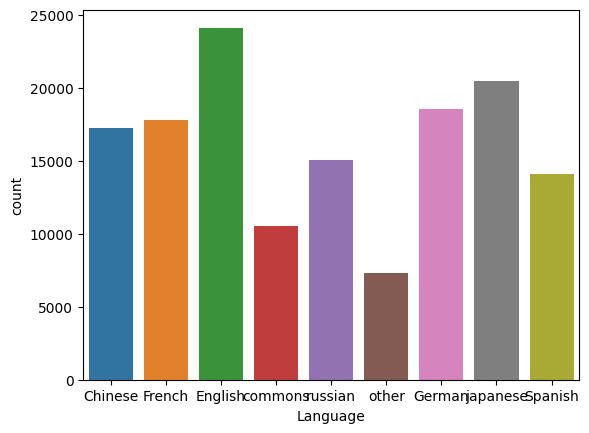

In [18]:
sns.countplot(data=df_train,x='Language')

In [19]:
df_train['name']= df_train['Page'].str.split('.').str[0]

In [20]:
df_train['name']

0                                                   2NE1_zh
1                                                    2PM_zh
2                                                     3C_zh
3                                                4minute_zh
4                                       52_Hz_I_Love_You_zh
                                ...                        
145058                   Underworld_(serie_de_películas)_es
145059                     Resident_Evil:_Capítulo_Final_es
145060                             Enamorándome_de_Ramón_es
145061                            Hasta_el_último_hombre_es
145062    Francisco_el_matemático_(serie_de_televisión_d...
Name: name, Length: 145063, dtype: object

In [21]:

df_train['Acc_type']=df_train['Page'].str.split(".wikipedia.org|.wikimedia.org|.mediawiki.org").str[1]

In [22]:
df_train["Access_type"] = df_train['Acc_type'].str.split('_').str[1]

In [23]:
df_train['Access_type'].value_counts()

all-access    74315
mobile-web    35937
desktop       34809
www               2
Name: Access_type, dtype: int64

In [24]:
sns.countplot(data=df_train, x='Access_type')

<Axes: xlabel='Access_type', ylabel='count'>

In [25]:
df_train['Access_origin'] = df_train['Acc_type'].str.split('_').str[2]

In [26]:
df_train['Access_origin'].value_counts()

all-agents    110148
spider         34913
Name: Access_origin, dtype: int64

In [27]:
sns.countplot(data=df_train, x='Access_origin')

<Axes: xlabel='Access_origin', ylabel='count'>

In [28]:
df_train.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-28  2016-12-29  2016-12-30  2016-12-31      Lang  \
0        26.0  ...        22.0        19.0        18.0        20.0   2NE1_zh   
1        10.0  ...        52.0        45.0        26.0        20.0    2PM_zh   
2         4.0  ...         6.0         3.0         4.0        17.0     3C_zh   
3        11.0  ...        17.0        19.0        10.0        11.0  inute_zh   
4         NaN  ...        27.0        13.0        36.0        10.0  e_You_zh   

   Language                 name            Acc_type  Access_type  \
0   Chinese              2NE1_zh  _all-access_spider   all-access   
1   Chinese               2PM_zh  _all-access_spider   all-access   
2   Chinese                3C_zh  _all-access_spider   all-access   
3   Chinese           4minute_zh  _all-access_spider   all-access   
4   Chinese  52_Hz_I_Love_You_zh  _all-access_spider   all-access   

   Access_origin  
0         spider  
1         spider  
2         spider  
3         spider  
4         spider  

[5 rows x 557 columns]

In [29]:
df_train = df_train.drop(['Page', 'Lang', 'Acc_type'], axis=1)

In [30]:
df_train.head()

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.0        11.0         5.0        13.0        14.0         9.0   
1        11.0        14.0        15.0        18.0        11.0        13.0   
2         1.0         0.0         1.0         1.0         0.0         4.0   
3        35.0        13.0        10.0        94.0         4.0        26.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-26  \
0         9.0        22.0        26.0        24.0  ...        14.0   
1        22.0        11.0        10.0         4.0  ...         9.0   
2         0.0         3.0         4.0         4.0  ...         4.0   
3        14.0         9.0        11.0        16.0  ...        16.0   
4         NaN         NaN         NaN         NaN  ...         3.0   

   2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  Language  \
0        20.0        22.0        19.0        18.0        20.0   Chinese   
1        30.0        52.0        45.0        26.0        20.0   Chinese   
2         4.0         6.0         3.0         4.0        17.0   Chinese   
3        11.0        17.0        19.0        10.0        11.0   Chinese   
4        11.0        27.0        13.0        36.0        10.0   Chinese   

                  name  Access_type  Access_origin  
0              2NE1_zh   all-access         spider  
1               2PM_zh   all-access         spider  
2                3C_zh   all-access         spider  
3           4minute_zh   all-access         spider  
4  52_Hz_I_Love_You_zh   all-access         spider  

[5 rows x 554 columns]

In [31]:
df_train.fillna(0, inplace=True)

In [32]:
df_train.columns[0:550]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [33]:
df_eda=df_train.groupby('Language')[df_train.columns[0:550]].median()

In [34]:

from datetime import datetime
date_list=[]
for i in df_eda.columns[0:550]:
    date_list.append(datetime.strptime(i, '%Y-%m-%d'))
weekday=[]
for i in date_list:
    weekday.append(i.weekday())
weekday=pd.Series(weekday)
weekend=[]
for i in weekday:
    if i in range(5):
        weekend.append(0)
    else:
        weekend.append(1)
weekend=pd.Series(weekend)

In [35]:
df_eda = df_eda.T
df_eda =df_eda.reset_index()
df_eda.rename(columns={'index': 'DATE'}, inplace=True)
df_eda['DATE'] = pd.to_datetime(df_eda['DATE'],format='%Y-%m-%d')
df_eda.head()

Language       DATE  Chinese  English  French  German  Spanish  commons  \
0        2015-07-01     32.0    103.0    72.0    62.0    267.0      2.0   
1        2015-07-02     29.0    100.0    72.0    62.0    262.0      2.0   
2        2015-07-03     28.0     90.0    71.5    59.0    237.0      3.0   
3        2015-07-04     29.0     87.0    71.0    61.0    199.0      3.0   
4        2015-07-05     31.0     93.0    78.0    71.0    237.0      2.0   

Language  japanese  other  russian  
0            125.0    3.0    136.0  
1            122.0    4.0    135.0  
2            128.0    3.0    137.0  
3            139.0    3.0    135.0  
4            138.0    3.0    141.0

In [36]:
df_eda['year'] = df_eda['DATE'].dt.year
df_eda['quarter'] = df_eda['DATE'].dt.quarter
df_eda['week'] = df_eda['DATE'].dt.week
df_eda['month'] = df_eda['DATE'].dt.month
df_eda['quarter_start'] = df_eda['DATE'].dt.is_quarter_start
df_eda['quarter_end'] = df_eda['DATE'].dt.is_quarter_end
df_eda['month_start'] = df_eda['DATE'].dt.is_month_start
df_eda['month_end'] = df_eda['DATE'].dt.is_month_end
df_eda['week_end'] = weekend
df_eda['week_day'] = weekday

In [128]:
df_eda.head()

Language       DATE  Chinese  English  French  German  Spanish  commons  \
0        2015-07-01     32.0    103.0    72.0    62.0    267.0      2.0   
1        2015-07-02     29.0    100.0    72.0    62.0    262.0      2.0   
2        2015-07-03     28.0     90.0    71.5    59.0    237.0      3.0   
3        2015-07-04     29.0     87.0    71.0    61.0    199.0      3.0   
4        2015-07-05     31.0     93.0    78.0    71.0    237.0      2.0   

Language  japanese  other  russian  year  quarter  week  month  quarter_start  \
0            125.0    3.0    136.0  2015        3    27      7           True   
1            122.0    4.0    135.0  2015        3    27      7          False   
2            128.0    3.0    137.0  2015        3    27      7          False   
3            139.0    3.0    135.0  2015        3    27      7          False   
4            138.0    3.0    141.0  2015        3    27      7          False   

Language  quarter_end  month_start  month_end  week_end  week_day  
0               False         True      False         0         2  
1               False        False      False         0         3  
2               False        False      False         0         4  
3               False        False      False         1         5  
4               False        False      False         1         6

<Axes: >

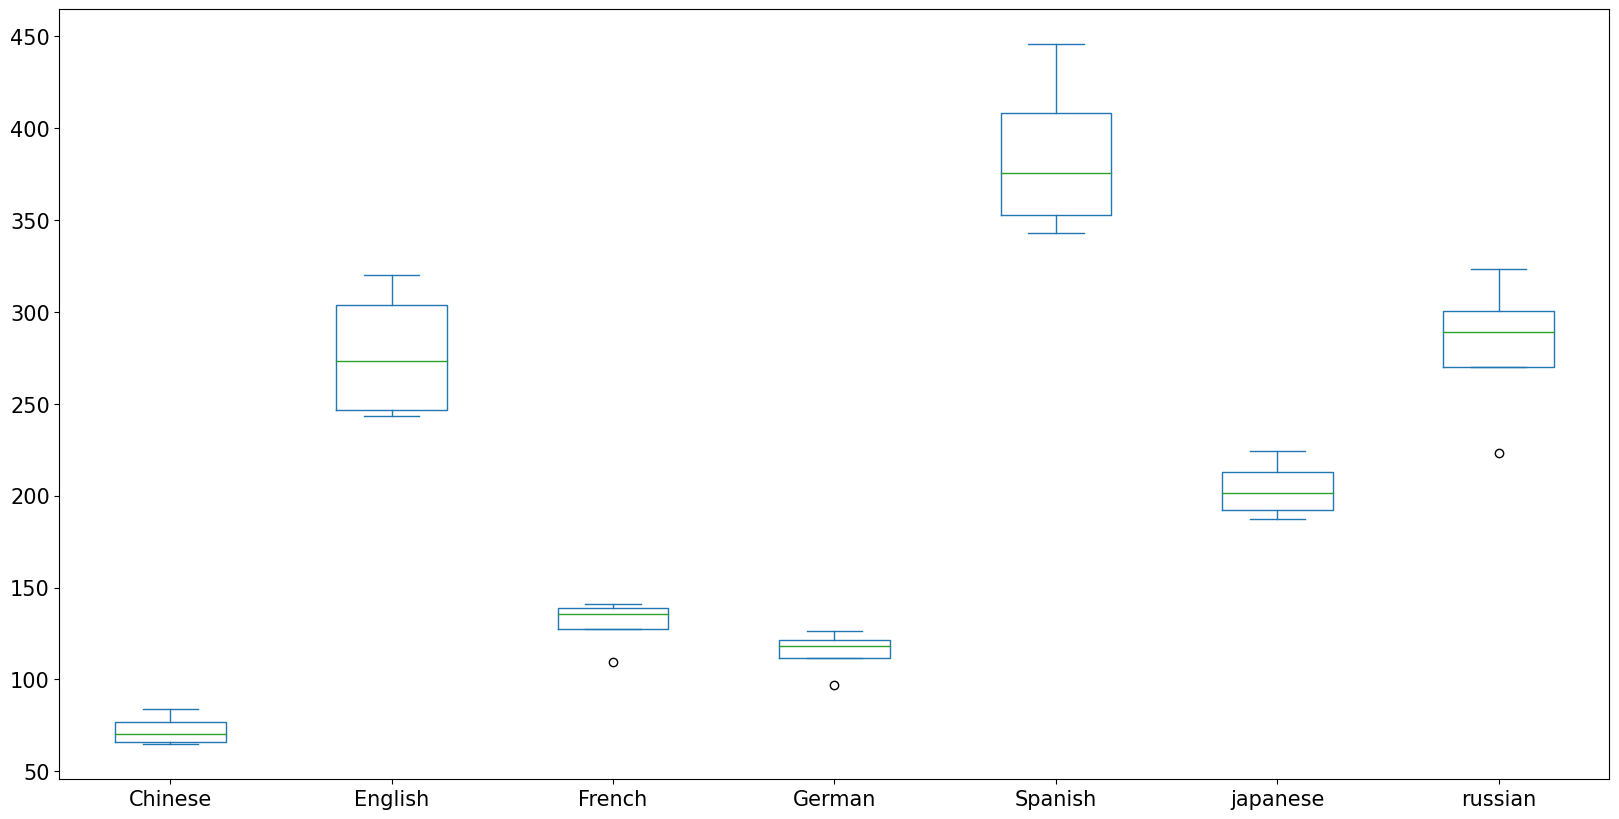

In [141]:
lang_quarter = df_eda.groupby('quarter')['Chinese','English','French','German','Spanish','japanese','russian'].mean()
lang_quarter.plot(kind='box')

<Axes: xlabel='quarter'>

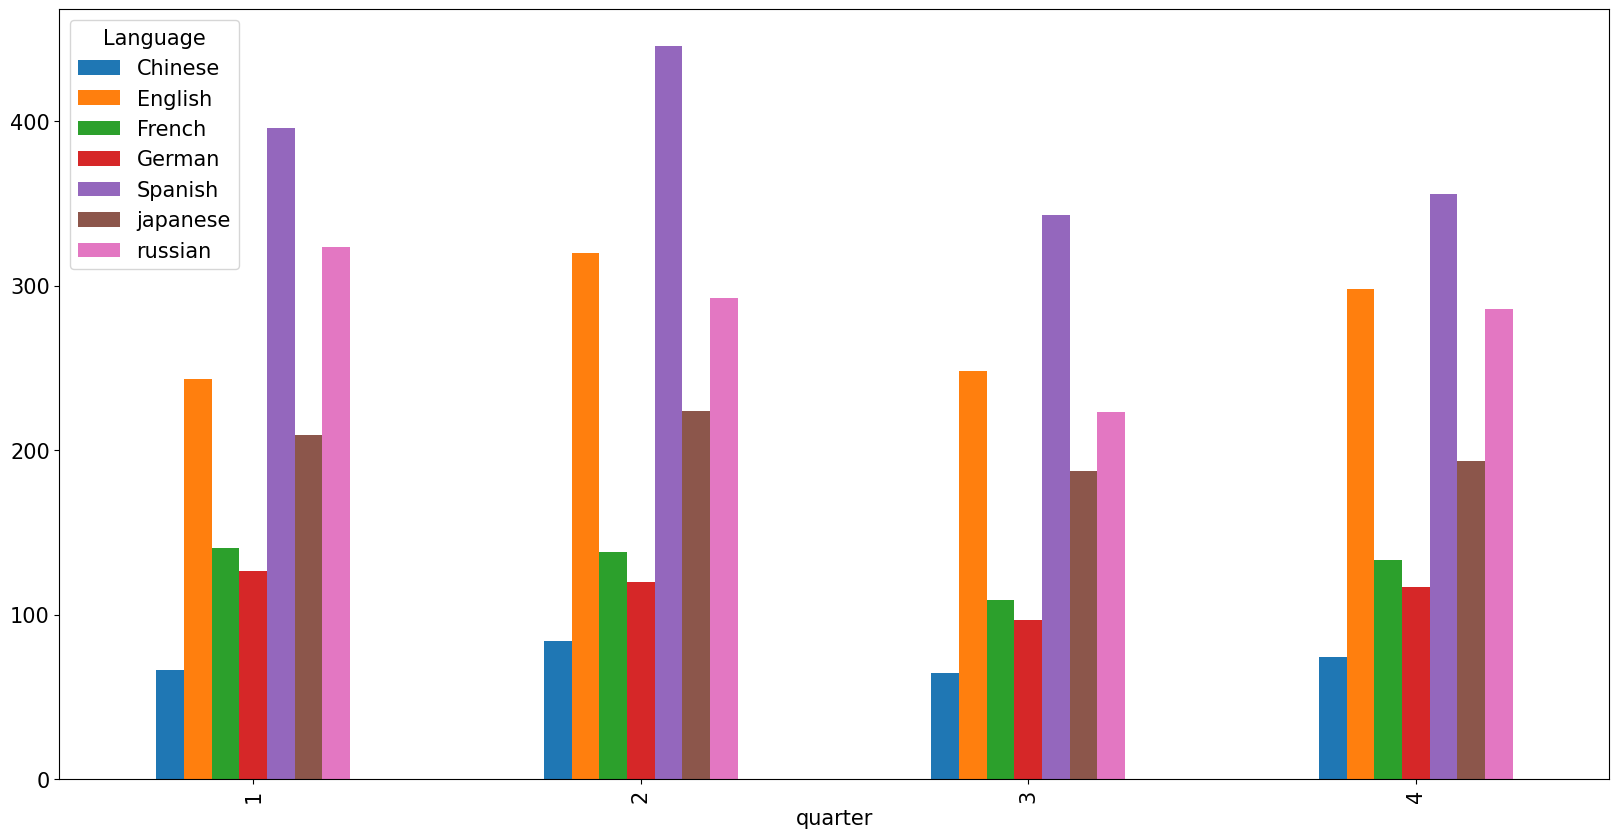

In [143]:
lang_quarter = df_eda.groupby('quarter')['Chinese','English','French','German','Spanish','japanese','russian'].mean()
lang_quarter.plot(kind='bar')

In [145]:
lang_quarter = df_eda.groupby('month')['Chinese','English','French','German','Spanish','japanese','russian'].mean()
lang_quarter.plot(kind='bar')

<Axes: xlabel='month'>

<Axes: xlabel='week_day'>

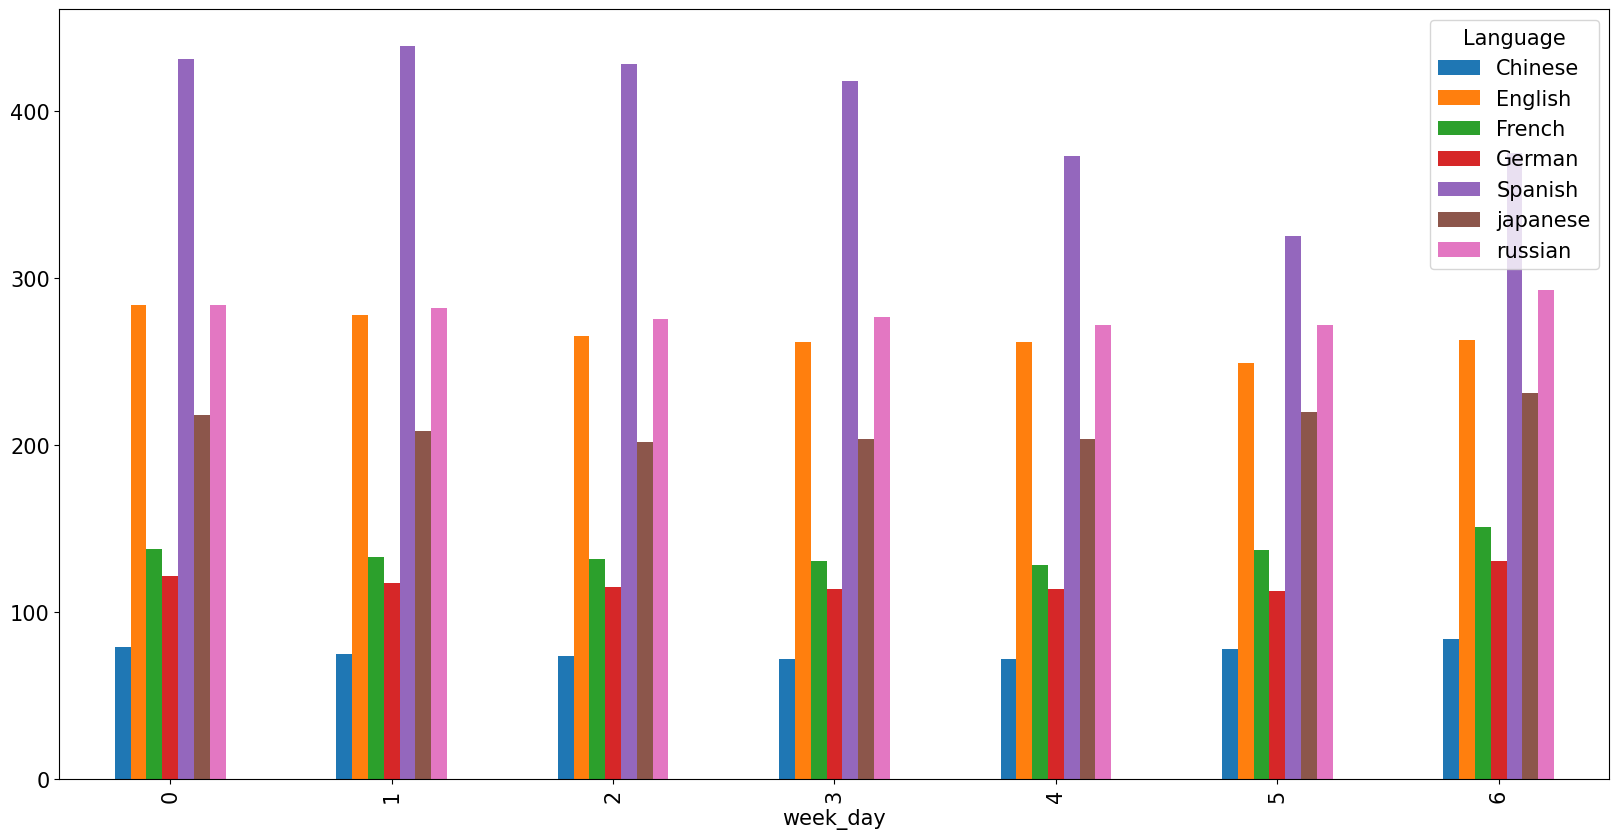

In [147]:
lang_quarter = df_eda.groupby('week_day')['Chinese','English','French','German','Spanish','japanese','russian'].median()
lang_quarter.plot(kind='bar')

In [38]:
df=df_train.groupby('Language')[df_train.columns[0:550]].median()
df

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
Language                                                               
Chinese         32.0        29.0        28.0        29.0        31.0   
English        103.0       100.0        90.0        87.0        93.0   
French          72.0        72.0        71.5        71.0        78.0   
German          62.0        62.0        59.0        61.0        71.0   
Spanish        267.0       262.0       237.0       199.0       237.0   
commons          2.0         2.0         3.0         3.0         2.0   
japanese       125.0       122.0       128.0       139.0       138.0   
other            3.0         4.0         3.0         3.0         3.0   
russian        136.0       135.0       137.0       135.0       141.0   

          2015-07-06  2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  \
Language                                                              ...   
Chinese         26.0        29.0        31.0        36.0        34.0  ...   
English         95.0       103.0       118.0       117.0       100.0  ...   
French          77.0        75.0        77.0        75.0        69.0  ...   
German          68.0        69.0        72.0        71.0        66.0  ...   
Spanish        277.0       272.0       268.0       262.0       238.0  ...   
commons          2.0         3.0         3.0         3.0         3.0  ...   
japanese       130.0       131.0       129.0       132.0       129.0  ...   
other            3.0         3.0         3.0         2.0         2.0  ...   
russian        143.0       143.0       144.0       145.0       170.5  ...   

          2016-12-22  2016-12-23  2016-12-24  2016-12-25  2016-12-26  \
Language                                                               
Chinese        104.0       103.0       105.0       116.0       112.0   
English        450.0       420.0       397.0       381.0       453.0   
French         162.0       157.0       142.0       156.0       189.0   
German         125.0       117.0       103.0       143.0       152.0   
Spanish        228.0       184.0       142.0       146.0       213.0   
commons          9.0         9.0         8.0         8.0         9.0   
japanese       213.0       241.0       230.0       232.0       219.0   
other            7.0         9.0         7.0         7.0         6.0   
russian        330.0       328.0       328.0       358.0       337.0   

          2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
Language                                                              
Chinese        114.0       114.0       107.0       106.0       104.0  
English        513.0       514.5       504.0       485.0       456.0  
French         192.0       191.0       188.0       190.0       164.0  
German         156.0       158.0       155.0       149.0       123.0  
Spanish        226.0       233.0       226.0       199.0       157.0  
commons          9.0         9.0         9.0         9.0         8.0  
japanese       226.0       215.0       228.0       235.0       220.0  
other            6.0         6.0         7.0         9.0         7.0  
russian        318.5       308.0       296.0       272.0       214.0  

[9 rows x 550 columns]

In [39]:
df=df.T
df

Language    Chinese  English  French  German  Spanish  commons  japanese  \
2015-07-01     32.0    103.0    72.0    62.0    267.0      2.0     125.0   
2015-07-02     29.0    100.0    72.0    62.0    262.0      2.0     122.0   
2015-07-03     28.0     90.0    71.5    59.0    237.0      3.0     128.0   
2015-07-04     29.0     87.0    71.0    61.0    199.0      3.0     139.0   
2015-07-05     31.0     93.0    78.0    71.0    237.0      2.0     138.0   
...             ...      ...     ...     ...      ...      ...       ...   
2016-12-27    114.0    513.0   192.0   156.0    226.0      9.0     226.0   
2016-12-28    114.0    514.5   191.0   158.0    233.0      9.0     215.0   
2016-12-29    107.0    504.0   188.0   155.0    226.0      9.0     228.0   
2016-12-30    106.0    485.0   190.0   149.0    199.0      9.0     235.0   
2016-12-31    104.0    456.0   164.0   123.0    157.0      8.0     220.0   

Language    other  russian  
2015-07-01    3.0    136.0  
2015-07-02    4.0    135.0  
2015-07-03    3.0    137.0  
2015-07-04    3.0    135.0  
2015-07-05    3.0    141.0  
...           ...      ...  
2016-12-27    6.0    318.5  
2016-12-28    6.0    308.0  
2016-12-29    7.0    296.0  
2016-12-30    9.0    272.0  
2016-12-31    7.0    214.0  

[550 rows x 9 columns]

In [40]:
df.index

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [41]:
df.dtypes

Language
Chinese     float64
English     float64
French      float64
German      float64
Spanish     float64
commons     float64
japanese    float64
other       float64
russian     float64
dtype: object

In [42]:
df = df.reset_index()
df.head()

Language       index  Chinese  English  French  German  Spanish  commons  \
0         2015-07-01     32.0    103.0    72.0    62.0    267.0      2.0   
1         2015-07-02     29.0    100.0    72.0    62.0    262.0      2.0   
2         2015-07-03     28.0     90.0    71.5    59.0    237.0      3.0   
3         2015-07-04     29.0     87.0    71.0    61.0    199.0      3.0   
4         2015-07-05     31.0     93.0    78.0    71.0    237.0      2.0   

Language  japanese  other  russian  
0            125.0    3.0    136.0  
1            122.0    4.0    135.0  
2            128.0    3.0    137.0  
3            139.0    3.0    135.0  
4            138.0    3.0    141.0

In [43]:
df.rename(columns={'index': 'DATE'}, inplace=True)


In [44]:
df.describe()

Language     Chinese     English      French      German     Spanish  \
count     550.000000  550.000000  550.000000  550.000000  550.000000   
mean       71.470909  275.892727  127.369091  112.334545  373.092727   
std        28.433831  120.030507   29.148717   22.149864   88.442857   
min        21.000000   87.000000   69.000000   59.000000   97.000000   
25%        42.250000  158.000000  103.000000   95.250000  315.000000   
50%        77.000000  268.500000  133.000000  117.000000  387.500000   
75%        96.000000  385.000000  144.000000  126.000000  447.750000   
max       126.000000  514.500000  294.000000  170.000000  531.000000   

Language     commons    japanese       other     russian  
count     550.000000  550.000000  550.000000  550.000000  
mean        6.420000  199.141818    6.238182  272.154545  
std         2.453198   38.099117    2.241884   57.983555  
min         2.000000   89.000000    2.000000  119.000000  
25%         4.000000  165.000000    5.000000  240.625000  
50%         7.000000  210.500000    7.000000  279.000000  
75%         8.000000  228.000000    8.000000  315.750000  
max        11.000000  280.000000   11.000000  620.000000

In [45]:
df['DATE'] = pd.to_datetime(df['DATE'],format='%Y-%m-%d')

In [46]:
df.set_index('DATE', inplace=True)

In [47]:
df['exog'] = exog_df['Exog'].values
df.tail()

Language    Chinese  English  French  German  Spanish  commons  japanese  \
DATE                                                                       
2016-12-27    114.0    513.0   192.0   156.0    226.0      9.0     226.0   
2016-12-28    114.0    514.5   191.0   158.0    233.0      9.0     215.0   
2016-12-29    107.0    504.0   188.0   155.0    226.0      9.0     228.0   
2016-12-30    106.0    485.0   190.0   149.0    199.0      9.0     235.0   
2016-12-31    104.0    456.0   164.0   123.0    157.0      8.0     220.0   

Language    other  russian  exog  
DATE                              
2016-12-27    6.0    318.5     1  
2016-12-28    6.0    308.0     1  
2016-12-29    7.0    296.0     1  
2016-12-30    9.0    272.0     0  
2016-12-31    7.0    214.0     0

In [48]:
lang_col=['commons','German','English','Spanish','French','japanese','other','russian','Chinese']
plt.rcParams['figure.figsize'] = (20, 6)
df.boxplot()
plt.show()

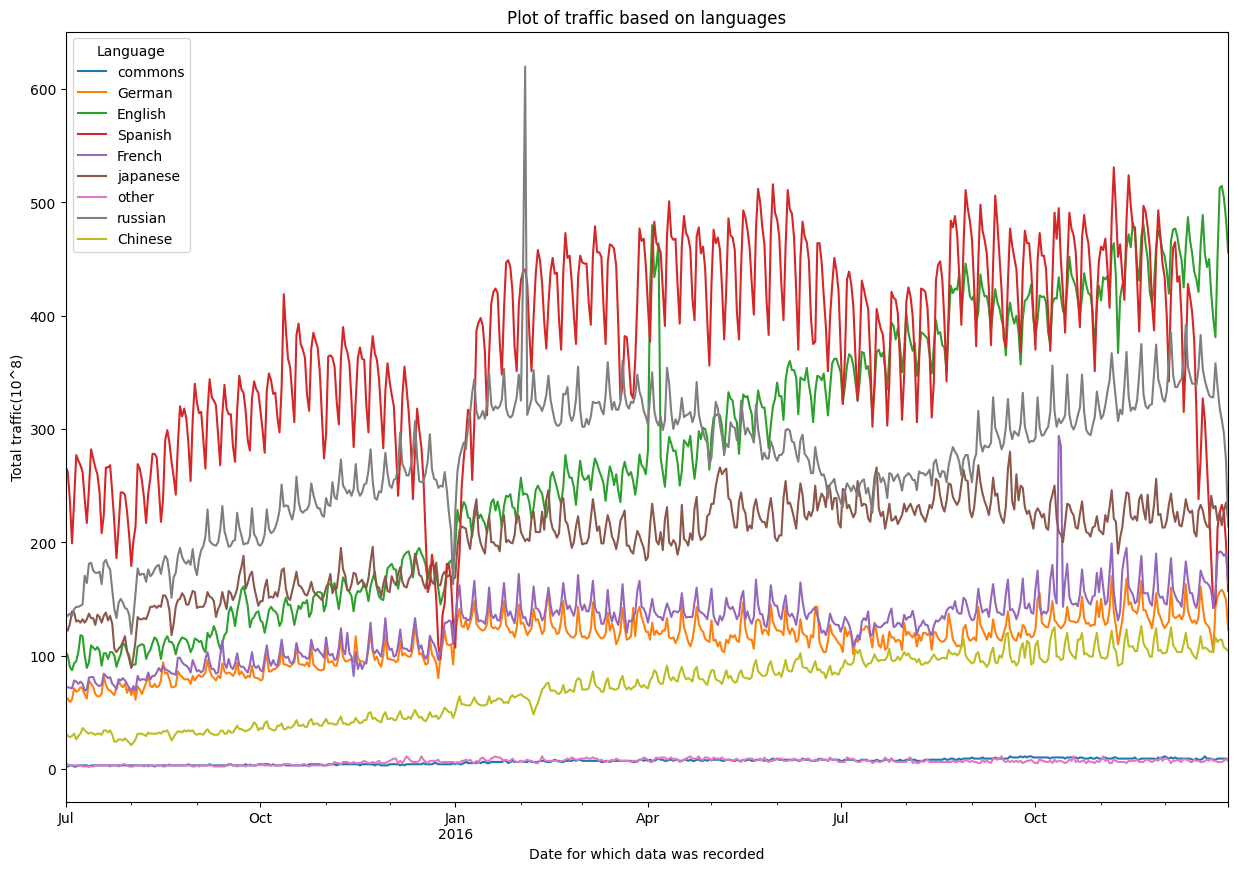

In [49]:
df[lang_col].plot(figsize=(15,10),title='Plot of traffic based on languages')
plt.xlabel('Date for which data was recorded')
plt.ylabel('Total traffic(10^8)')
plt.show()

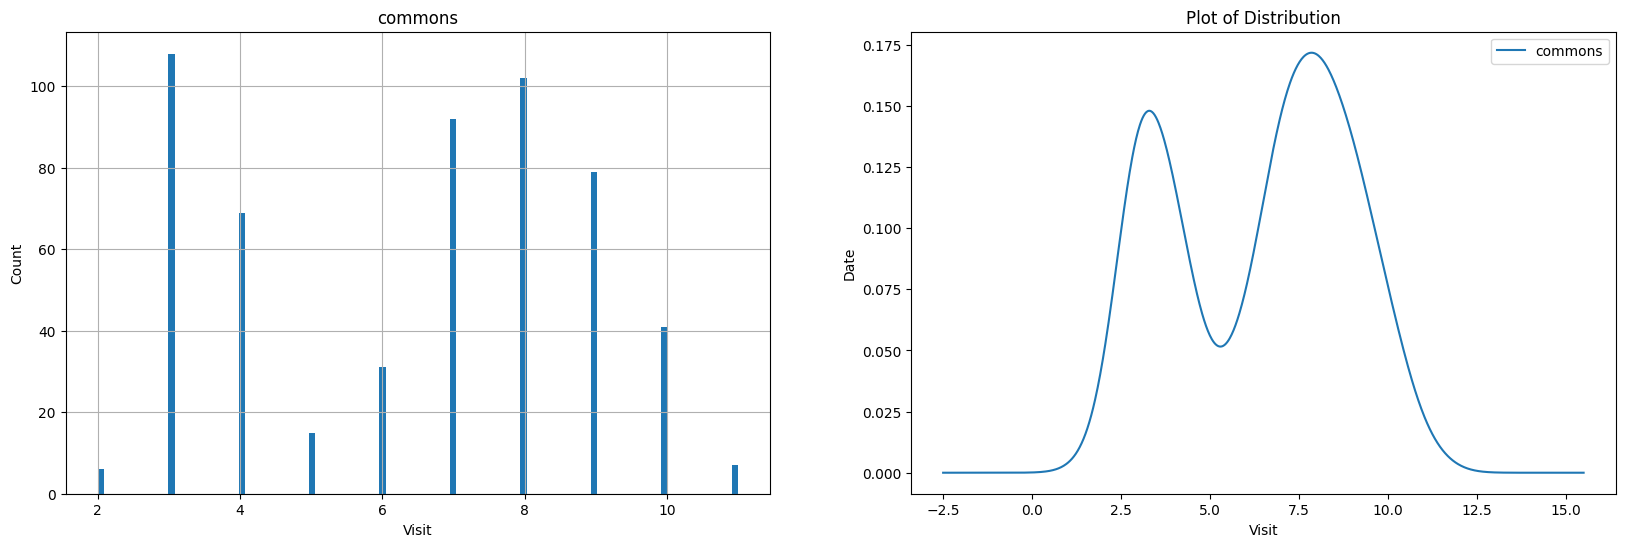

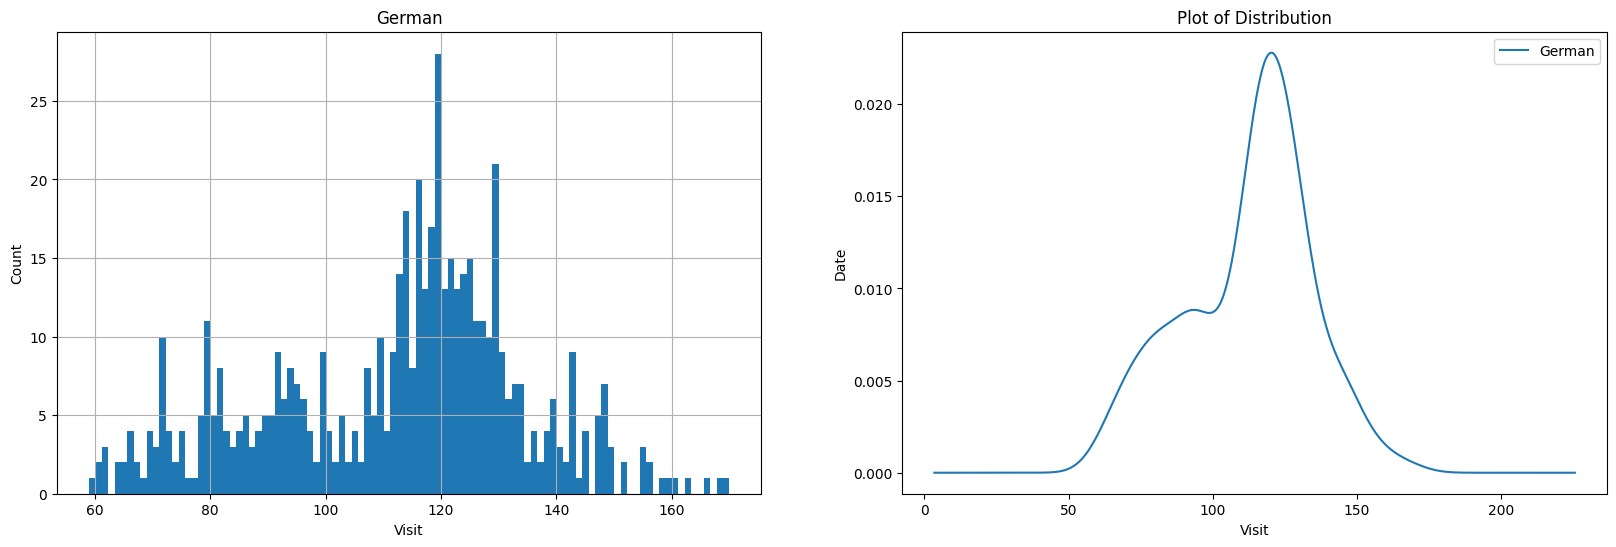

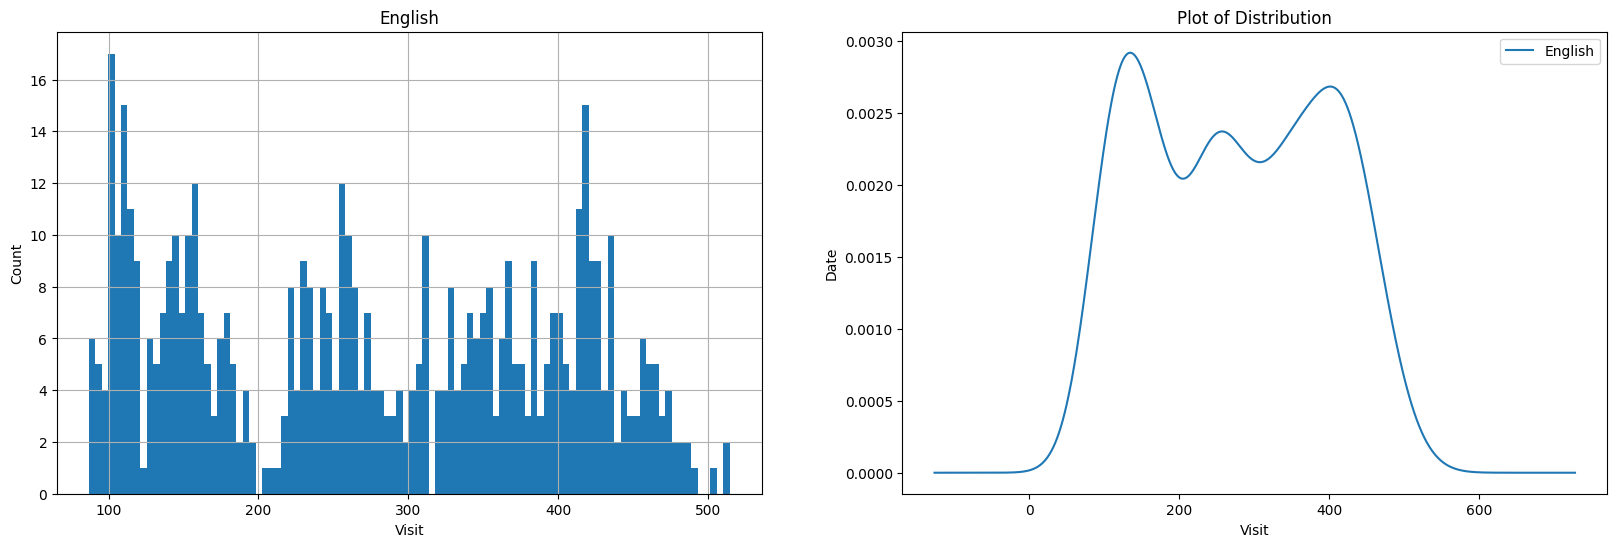

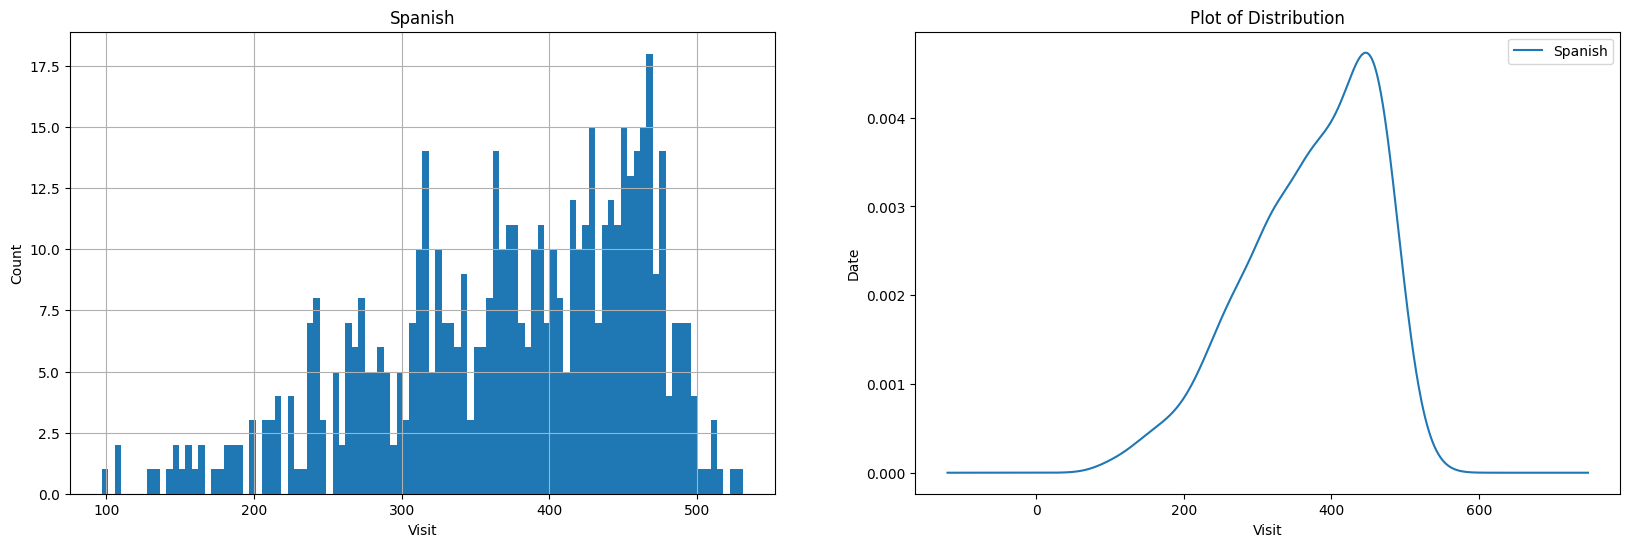

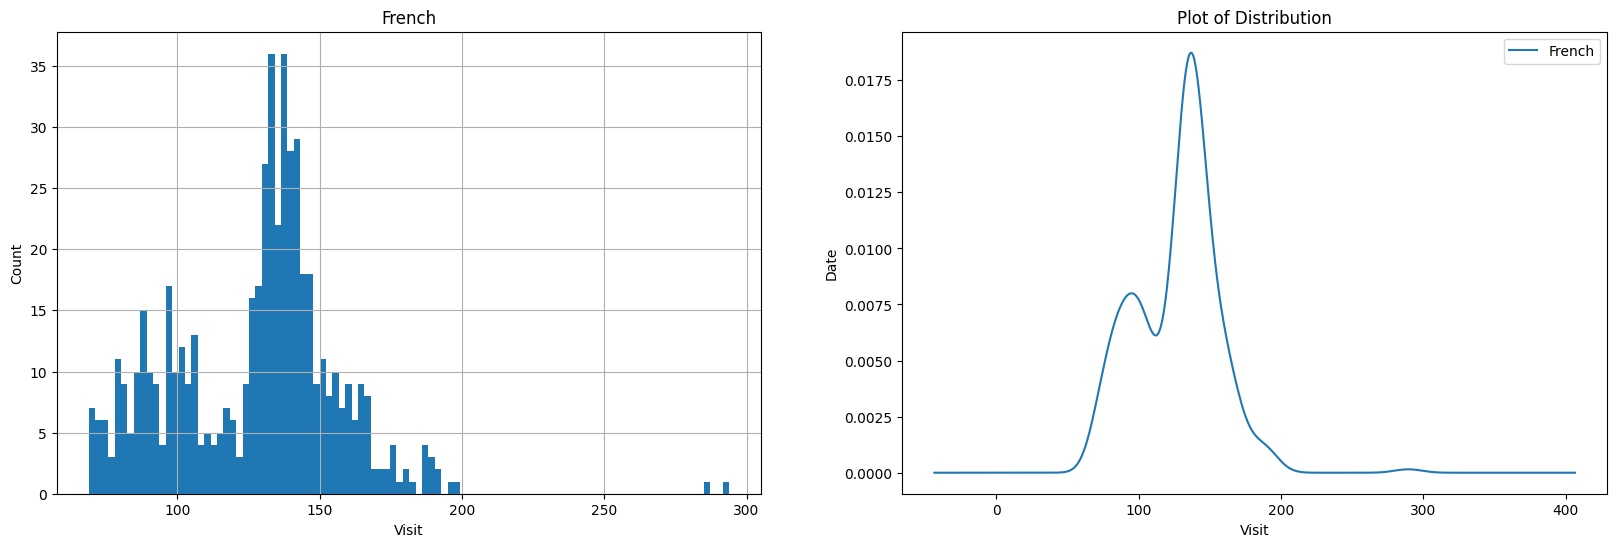

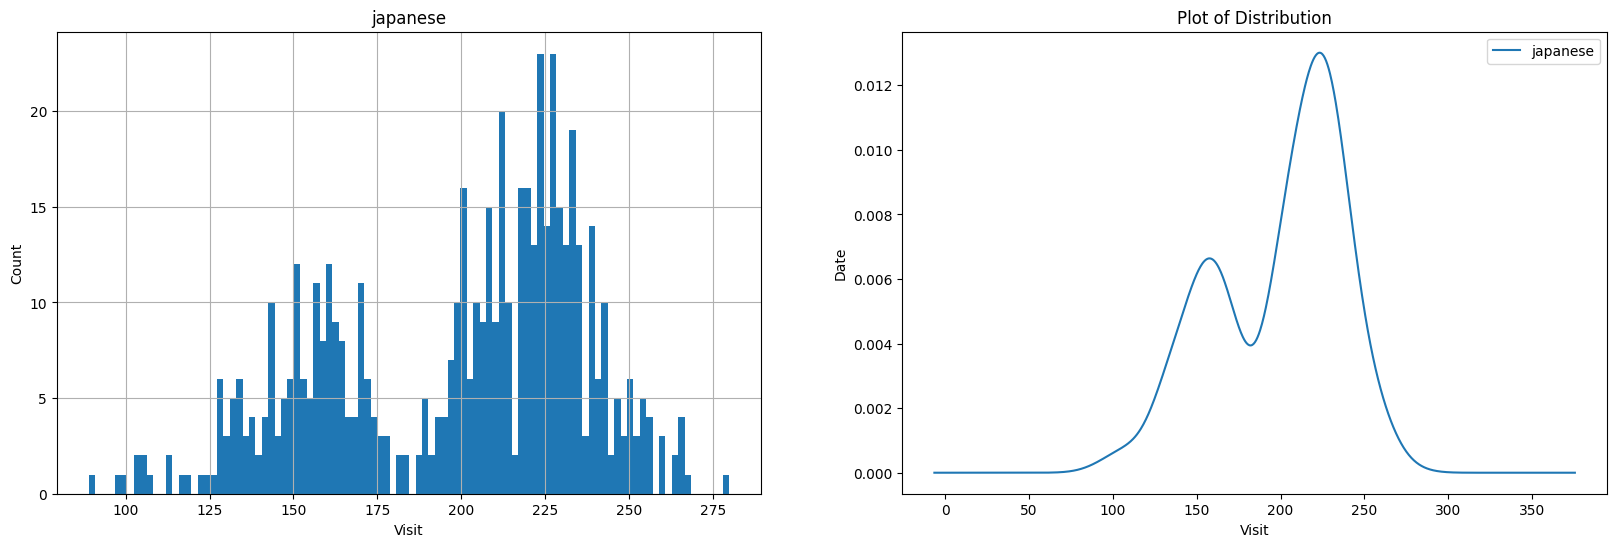

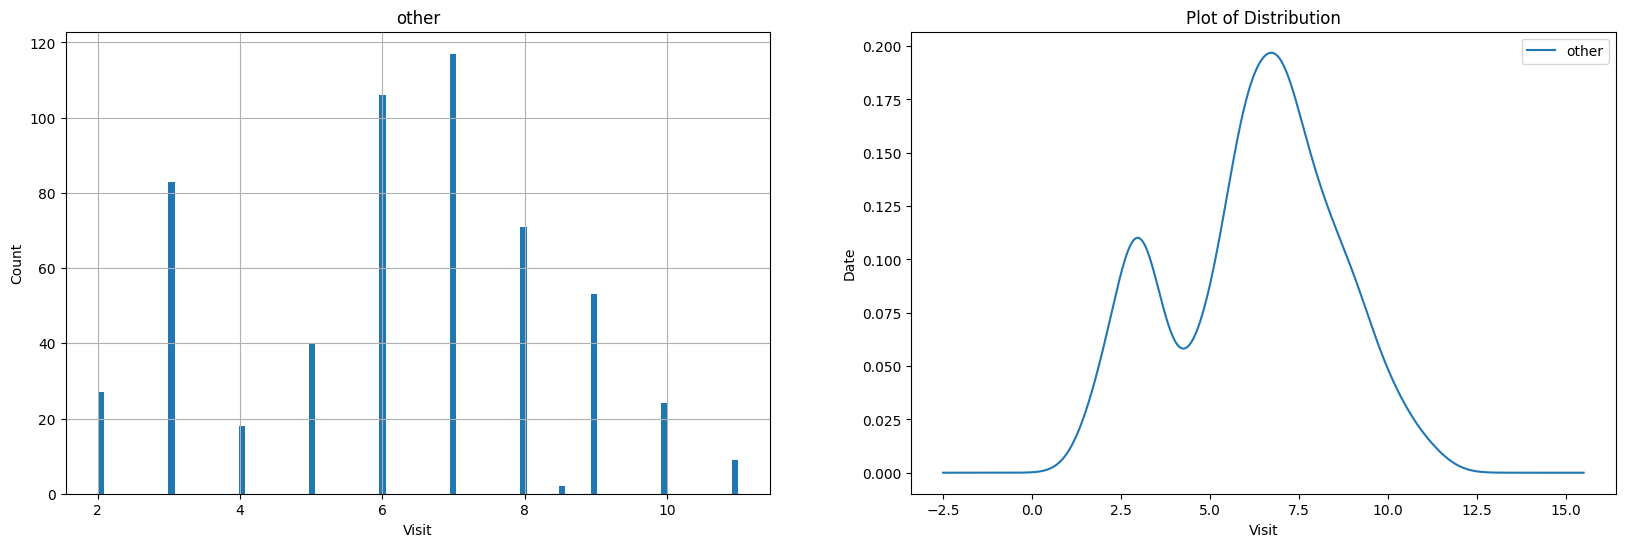

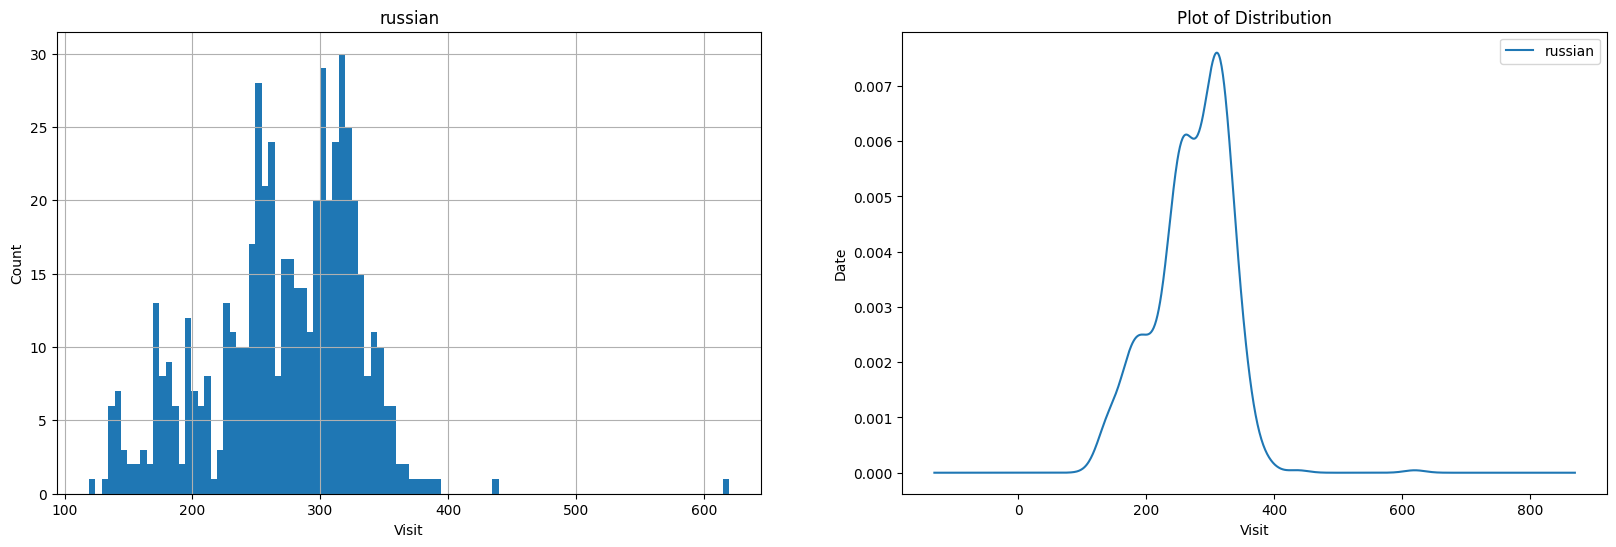

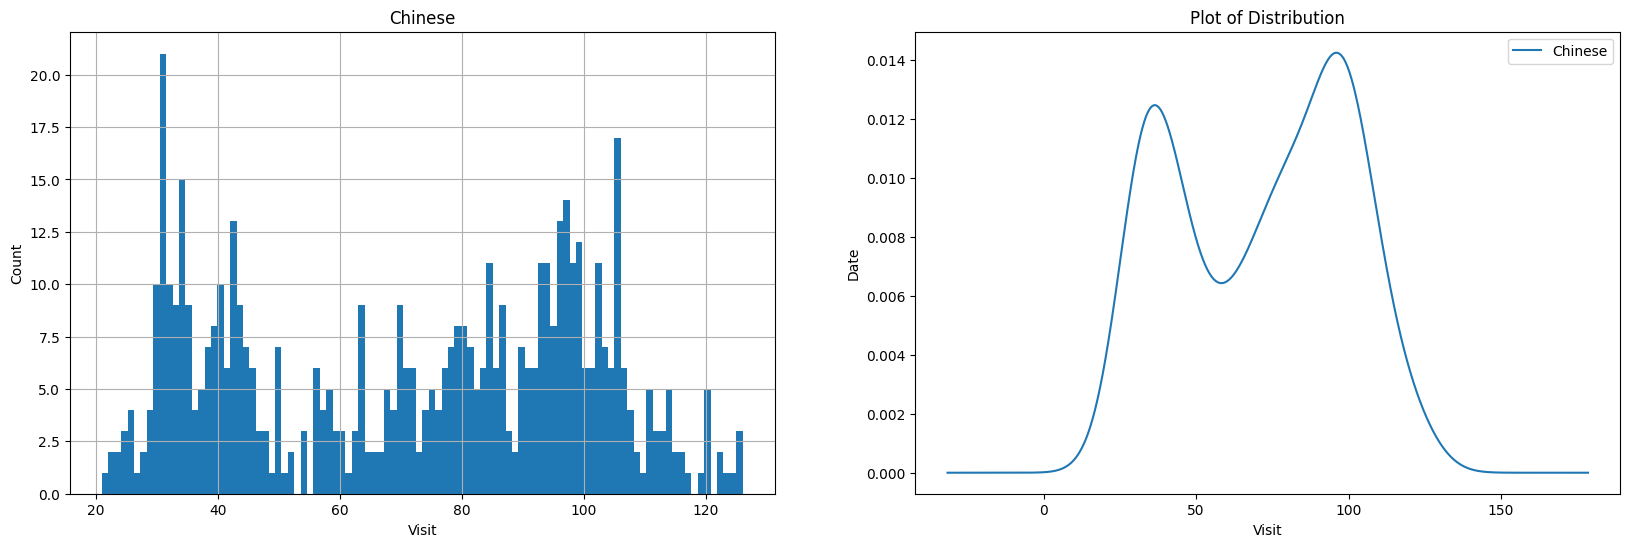

In [50]:
 for col in lang_col:
  plt.subplot(121)
  df[col].hist(bins=100).plot()
  plt.title(col)
  plt.ylabel('Count')
  plt.xlabel('Visit')
 
  plt.subplot(122)
  # plot data on the right subplot
  df_close = df[col]
  df_close.plot(kind='kde')
  plt.title('Plot of Distribution')
  plt.xlabel('Visit')
  plt.ylabel('Date')
  plt.legend()
  plt.show()
  # add space betwe

<Axes: xlabel='Language'>

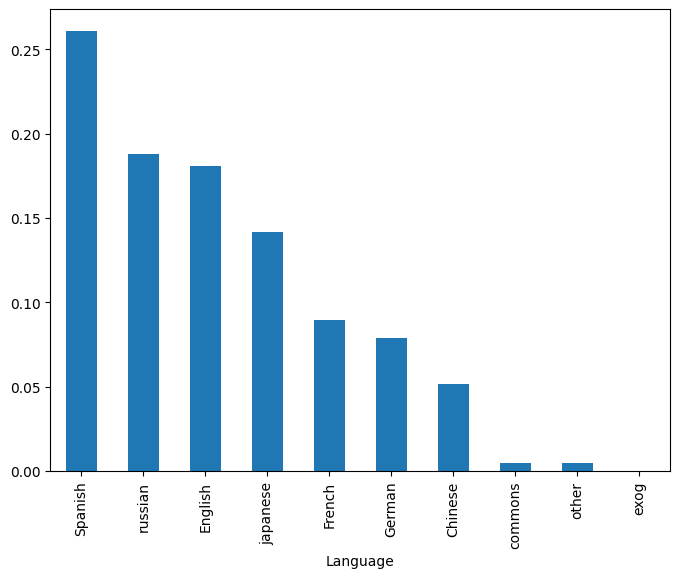

In [52]:
plt.rcParams['figure.figsize'] = (8, 6)
(df.median(axis=0).sort_values(ascending=False)/df.median(axis=0).sort_values(ascending=False).sum()).plot(kind='bar')

### Stationarity (Dickey-Fuller test)

ADF (Augmented Dickey-Fuller) Test
One of the most widely used statistical tests is the Dickey-Fuller test. It can be used to determine whether or not a series has a unit root, and thus whether or not the series is stationary. This test’s null and alternate hypotheses are:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If the null hypothesis is not rejected, the series is said to be non-stationary. The series can be linear or difference stationary as a result of this.

The series becomes stationary if both the mean and standard deviation are flat lines (constant mean and constant variance).

commons


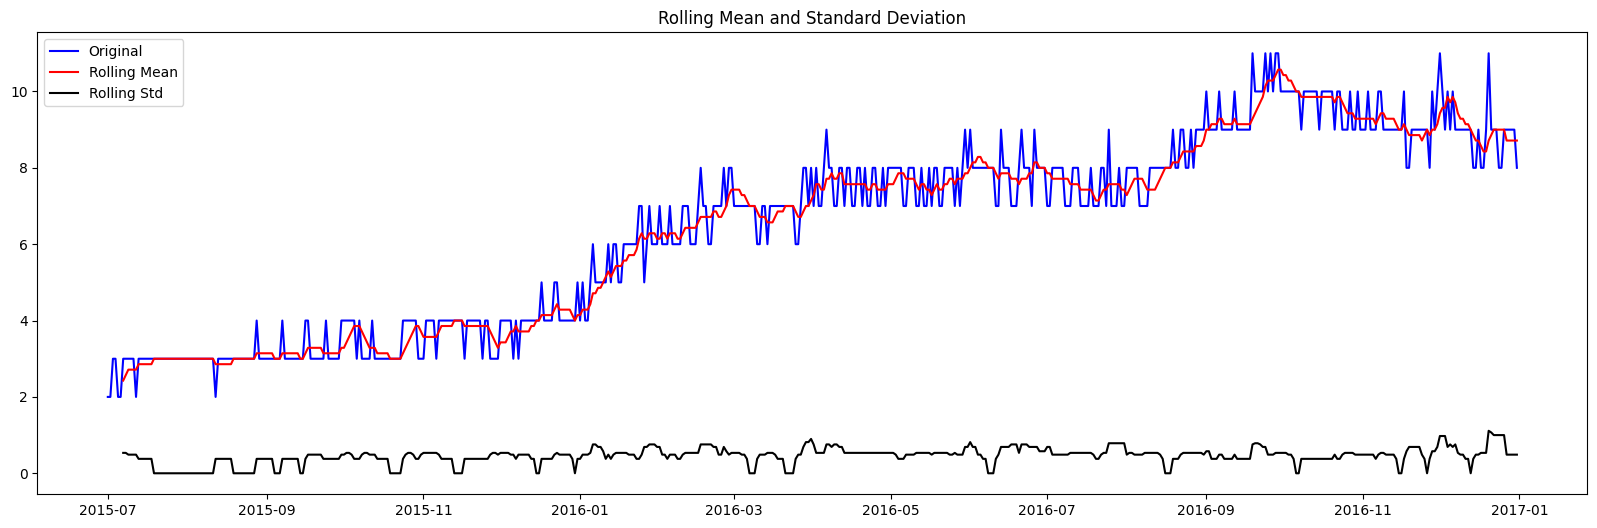

*******************************************************************************************************************************************************************************
Results of dickey fuller test
Sequence is not stationary
Test Statistics                 -1.346184
p-value                          0.607788
No. of lags used                 6.000000
Number of observations used    543.000000
critical value (1%)             -3.442450
critical value (5%)             -2.866877
critical value (10%)            -2.569613
dtype: float64
German


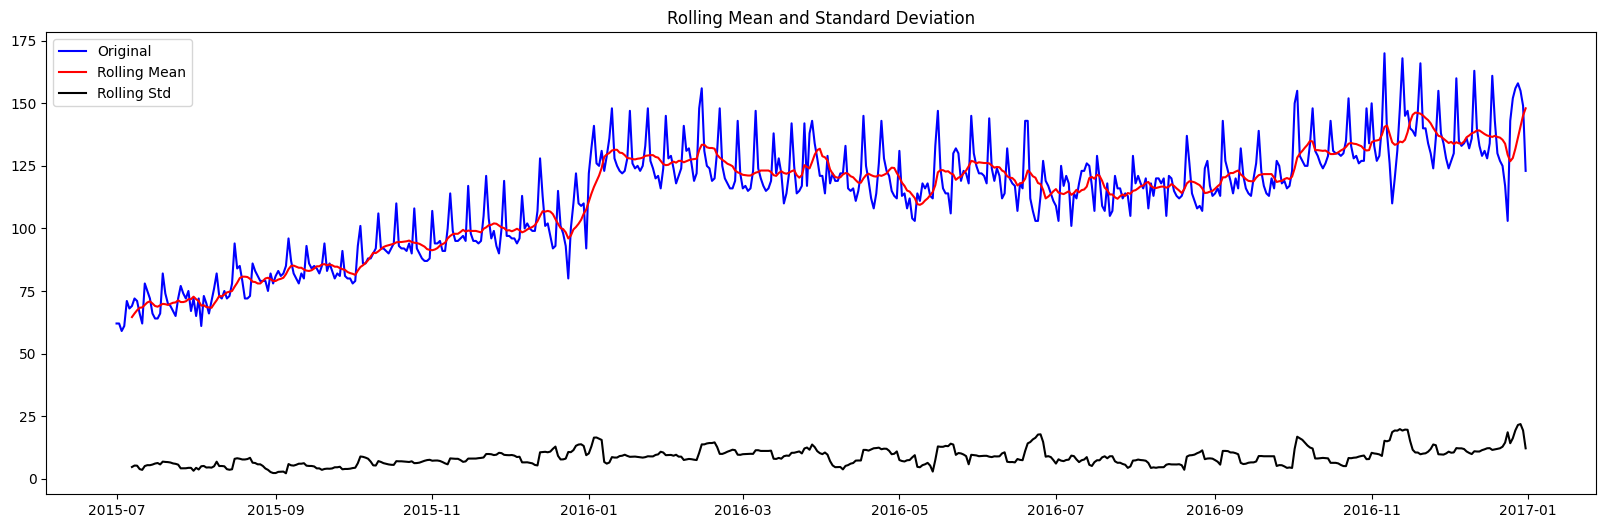

*******************************************************************************************************************************************************************************
Results of dickey fuller test
Sequence is not stationary
Test Statistics                 -1.679806
p-value                          0.441546
No. of lags used                14.000000
Number of observations used    535.000000
critical value (1%)             -3.442632
critical value (5%)             -2.866957
critical value (10%)            -2.569655
dtype: float64
English


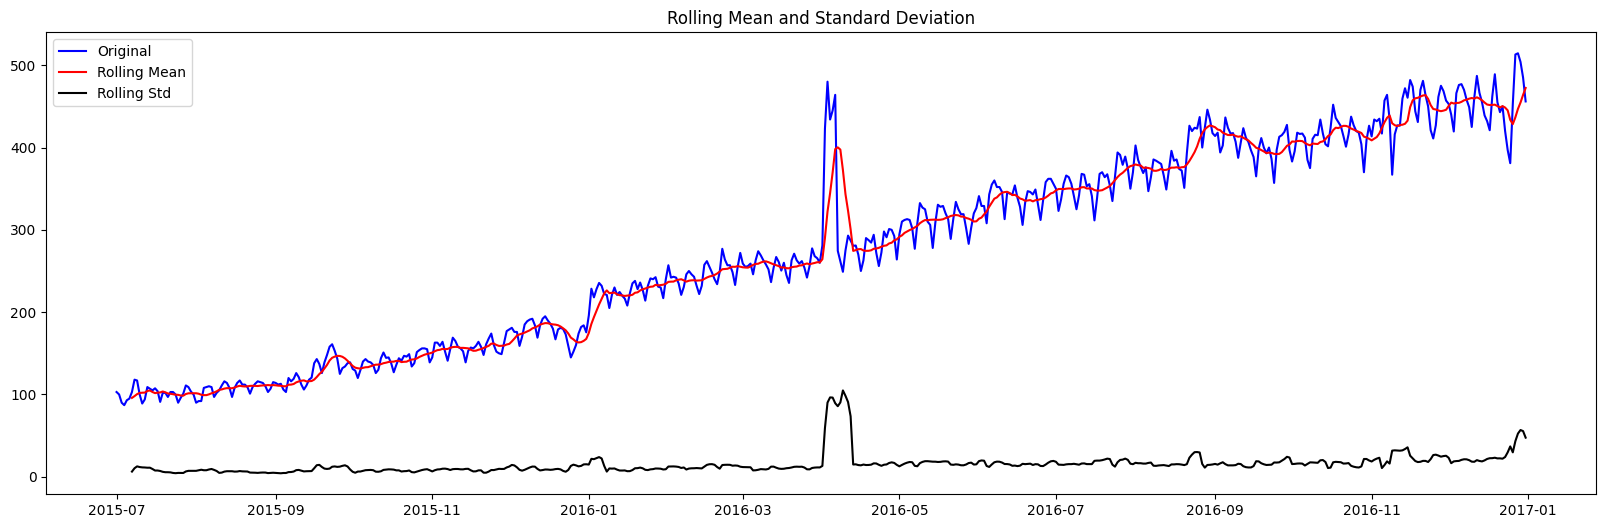

*******************************************************************************************************************************************************************************
Results of dickey fuller test
Sequence is not stationary
Test Statistics                 -0.303207
p-value                          0.925049
No. of lags used                18.000000
Number of observations used    531.000000
critical value (1%)             -3.442725
critical value (5%)             -2.866998
critical value (10%)            -2.569677
dtype: float64
Spanish


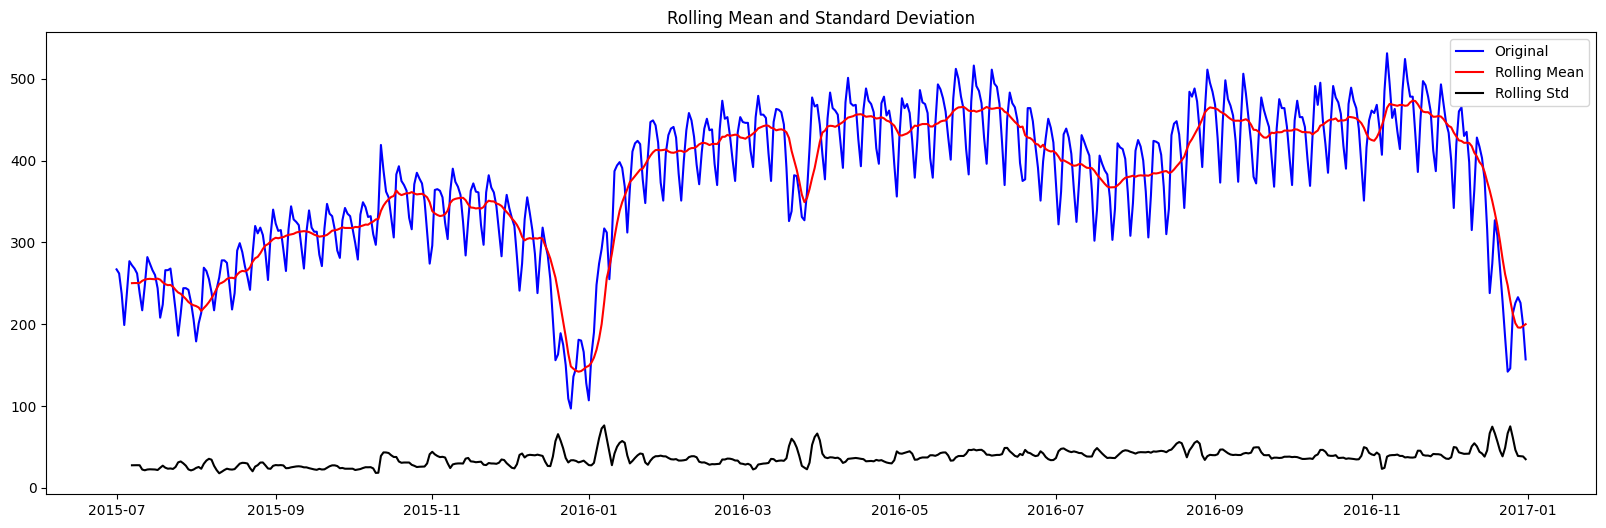

*******************************************************************************************************************************************************************************
Results of dickey fuller test
Sequence is not stationary
Test Statistics                 -2.290332
p-value                          0.175105
No. of lags used                19.000000
Number of observations used    530.000000
critical value (1%)             -3.442749
critical value (5%)             -2.867009
critical value (10%)            -2.569683
dtype: float64
French


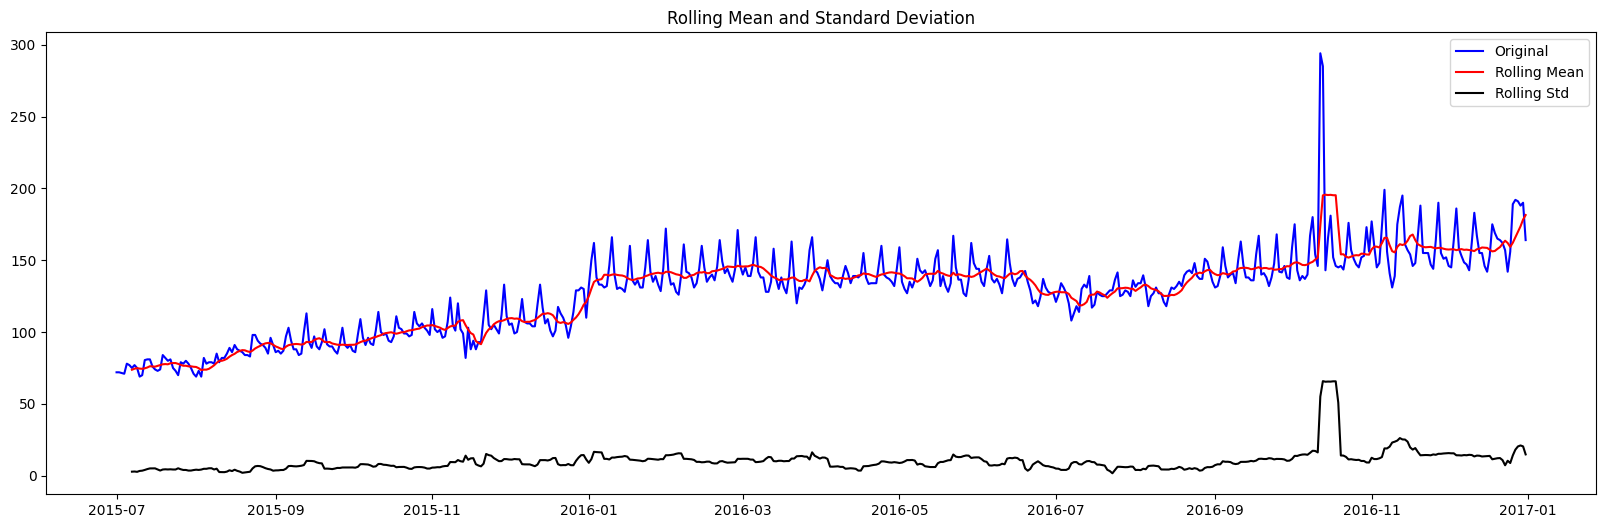

*******************************************************************************************************************************************************************************
Results of dickey fuller test
Sequence is not stationary
Test Statistics                 -1.193360
p-value                          0.676445
No. of lags used                19.000000
Number of observations used    530.000000
critical value (1%)             -3.442749
critical value (5%)             -2.867009
critical value (10%)            -2.569683
dtype: float64
japanese


*******************************************************************************************************************************************************************************
Results of dickey fuller test
Sequence is not stationary
Test Statistics                 -1.786693
p-value                          0.387088
No. of lags used                19.000000
Number of observations used    530.000000
critical value (1%)             -3.442749
critical value (5%)             -2.867009
critical value (10%)            -2.569683
dtype: float64
other


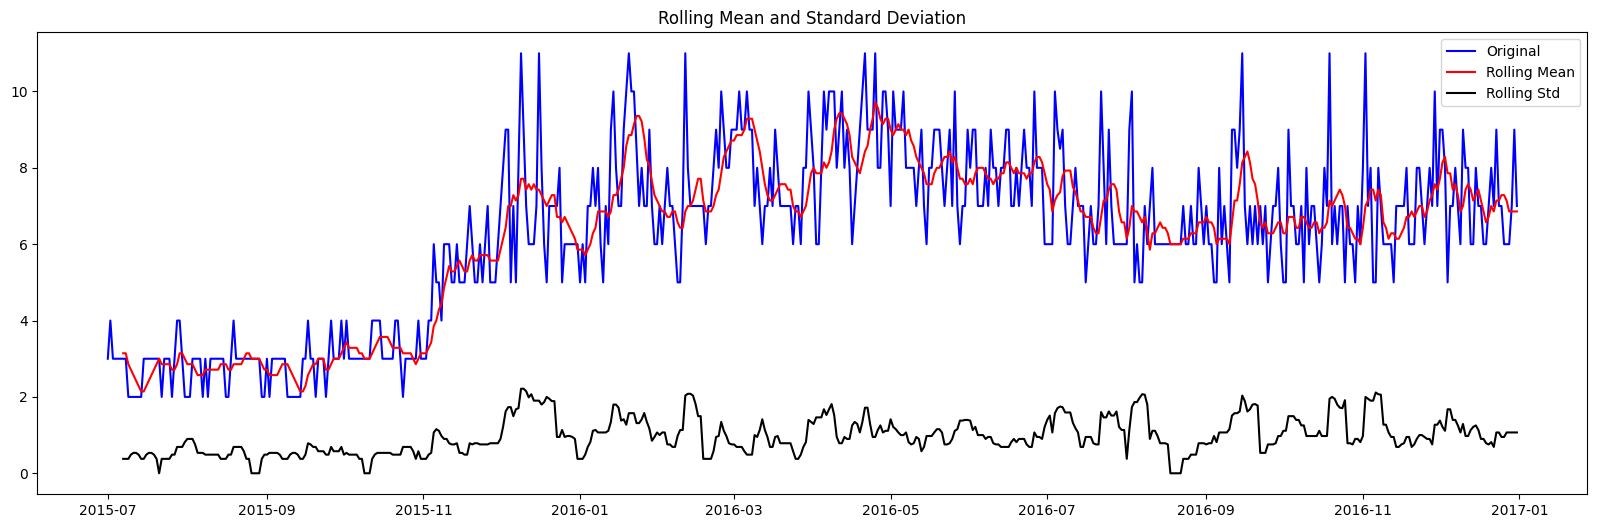

*******************************************************************************************************************************************************************************
Results of dickey fuller test
Sequence is not stationary
Test Statistics                 -1.900135
p-value                          0.331998
No. of lags used                19.000000
Number of observations used    530.000000
critical value (1%)             -3.442749
critical value (5%)             -2.867009
critical value (10%)            -2.569683
dtype: float64
russian


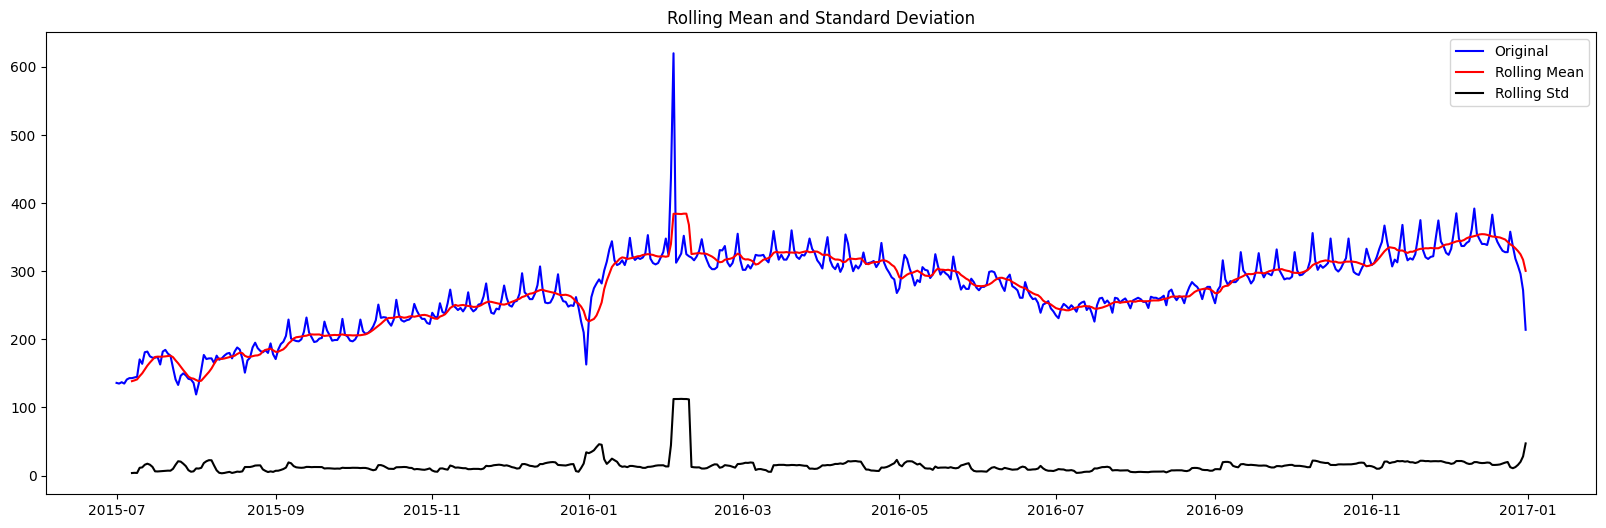

*******************************************************************************************************************************************************************************
Results of dickey fuller test
Sequence is not stationary
Test Statistics                 -2.052370
p-value                          0.264093
No. of lags used                14.000000
Number of observations used    535.000000
critical value (1%)             -3.442632
critical value (5%)             -2.866957
critical value (10%)            -2.569655
dtype: float64
Chinese


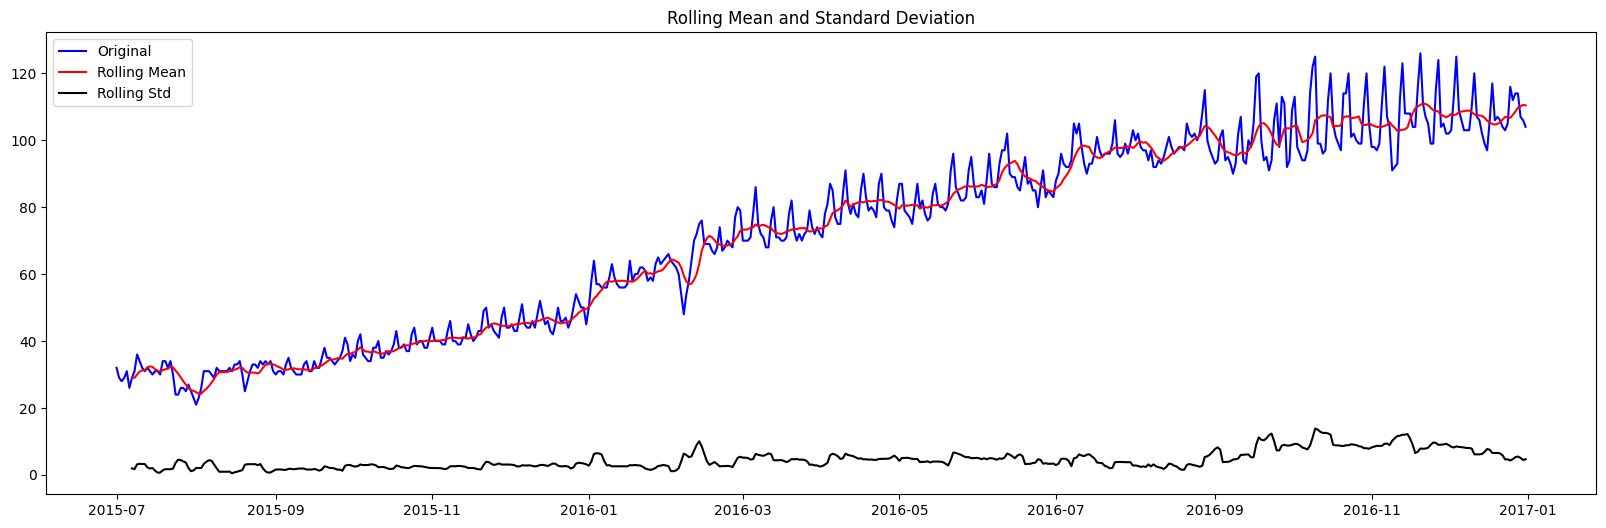

*******************************************************************************************************************************************************************************
Results of dickey fuller test
Sequence is not stationary
Test Statistics                 -0.670866
p-value                          0.854152
No. of lags used                14.000000
Number of observations used    535.000000
critical value (1%)             -3.442632
critical value (5%)             -2.866957
critical value (10%)            -2.569655
dtype: float64


In [54]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

#Test for staionarity
plt.rcParams['figure.figsize'] = (20, 6)
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(7).mean()
    rolstd = timeseries.rolling(7).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("*******************************************************************************************************************************************************************************")
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    if adft[1] <= 0.05:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    
    print(output)

for col in lang_col:
  print(col)
  test_stationarity(df[col])


##Decomposition & Differencing the Time Series

###Decomposition by 'english'

In [56]:

import statsmodels.api as sm
model = sm.tsa.seasonal_decompose(df['English'], model='additive')

In [57]:
plt.rcParams['figure.figsize'] = (20, 10)

In [58]:
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)
result = sm.tsa.seasonal_decompose(df['English'], model='aditive')
fig = result.plot()

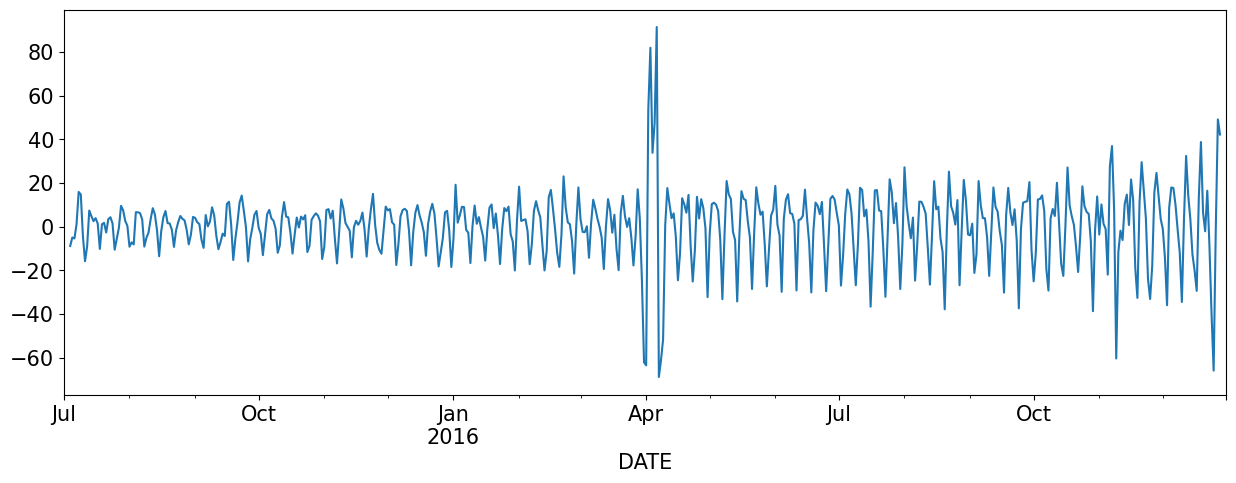

In [59]:
trend_temp = df['English'].rolling(7, center=True).mean()
de_trend = df['English'] - trend_temp
de_trend.plot(figsize=(15, 5))
plt.show()

In [60]:
dtf = de_trend.reset_index()
dtf.groupby(dtf['DATE'].dt.day_of_week)['English'].mean().plot(style='-o')
plt.show()

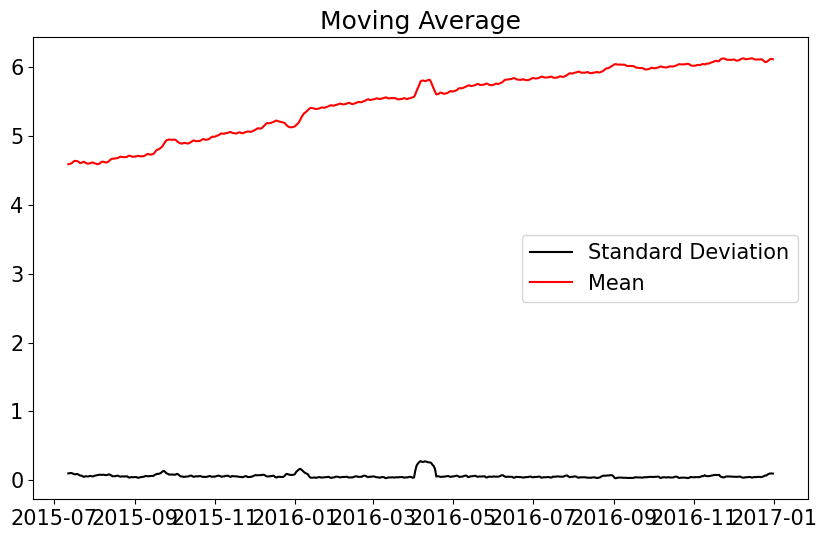

In [69]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df['English'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


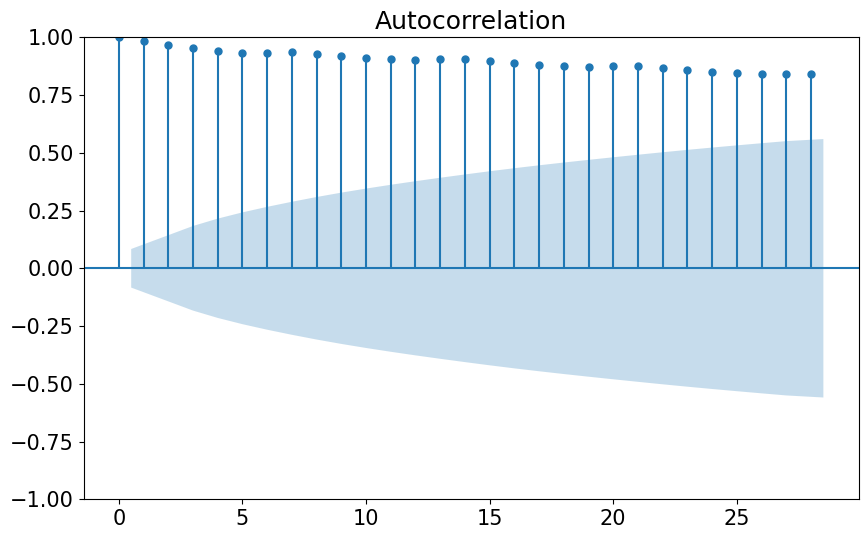

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
z = plot_acf(df['English'])

In [64]:
y = plot_pacf(df['English'], lags=None)

### Splitting Dataset And Training Model

In [65]:
train_data =df.loc[df.index[:-61]]
test_data = df.loc[df.index[-61:]]

In [66]:
train_data.head()

Language    Chinese  English  French  German  Spanish  commons  japanese  \
DATE                                                                       
2015-07-01     32.0    103.0    72.0    62.0    267.0      2.0     125.0   
2015-07-02     29.0    100.0    72.0    62.0    262.0      2.0     122.0   
2015-07-03     28.0     90.0    71.5    59.0    237.0      3.0     128.0   
2015-07-04     29.0     87.0    71.0    61.0    199.0      3.0     139.0   
2015-07-05     31.0     93.0    78.0    71.0    237.0      2.0     138.0   

Language    other  russian  exog  
DATE                              
2015-07-01    3.0    136.0     0  
2015-07-02    4.0    135.0     0  
2015-07-03    3.0    137.0     0  
2015-07-04    3.0    135.0     0  
2015-07-05    3.0    141.0     0

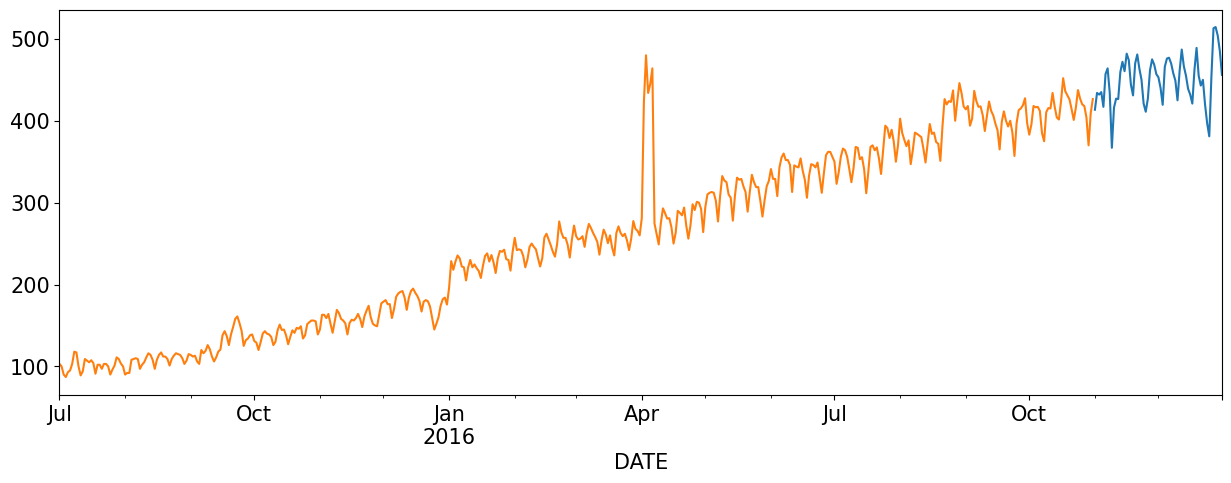

In [67]:
test_data['English'].plot( figsize=(15, 5), label='actual')
train_data['English'].plot( label='actual')
plt.show()

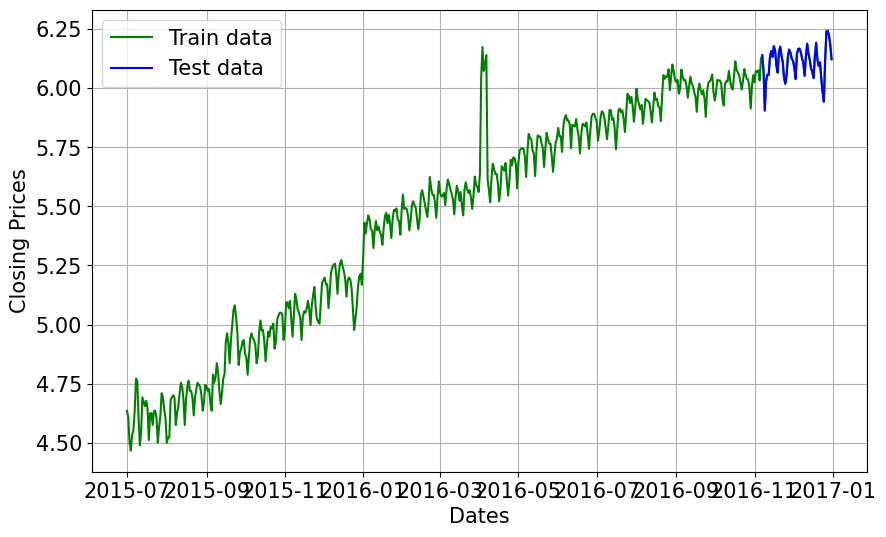

In [74]:
train_data, test_data = df_log[:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [69]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data['English'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=8, 
                      max_q=9, # maximum p and q
                      m=12,
                      start_P=0, seasonal=True,
                      d=1, 
                      D=1,             # frequency of series
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(20,8))
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=2.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4490.226, Time=0.15 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4343.630, Time=1.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.79 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4489.861, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4252.309, Time=1.11 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.21 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4250.312, Time=0.71 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4349.688, Time=0.29 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=7.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.87 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4252.306, Time=1.00 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=7.35 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=4252.309, T

In [70]:
#Modeling
# Build Model
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data['English'], order=(0, 1, 0),seasonal_order=(2,1,0,12))
model = model.fit(disp=False)
#model = SARIMAX(train_data, order=(0, 1, 0), seasonal_order=(2,1,0,12)) 
#model = model.fit(disp=False)
#model = sm.tsa.arima.ARIMA(train_data, order=(1,0,3))  
#fitted = model.fit(disp=False)  
print(model.summary())


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            English   No. Observations:                  489
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -2122.156
Date:                            Fri, 21 Apr 2023   AIC                           4250.312
Time:                                    11:53:58   BIC                           4262.808
Sample:                                07-01-2015   HQIC                          4255.225
                                     - 10-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7422      0.024    -30.300      0.000      -0.790      -0.694
ar.S.L24      -0.4408      0.022   

In [71]:
def forecast_to_df(model, steps):
    forecast = model.get_forecast(steps=steps)
    pred_df = forecast.conf_int(0.01)
    pred_df['pred'] = forecast.predicted_mean
    pred_df.columns = ['lower', 'upper', 'pred']
    return pred_df

In [72]:
# Returns a dataframe
pred_df = forecast_to_df(model, steps = len(test_data))

In [73]:
pred = pred_df['pred'] 
# Calculate MSE 
#mse = mean_squared_error(pred, test_data)
pred_df['pred']

2016-11-01    429.248714
2016-11-02    437.737626
2016-11-03    437.656387
2016-11-04    445.119174
2016-11-05    442.946196
                 ...    
2016-12-27    477.664072
2016-12-28    473.393977
2016-12-29    483.761535
2016-12-30    485.078951
2016-12-31    482.689127
Freq: D, Name: pred, Length: 61, dtype: float64

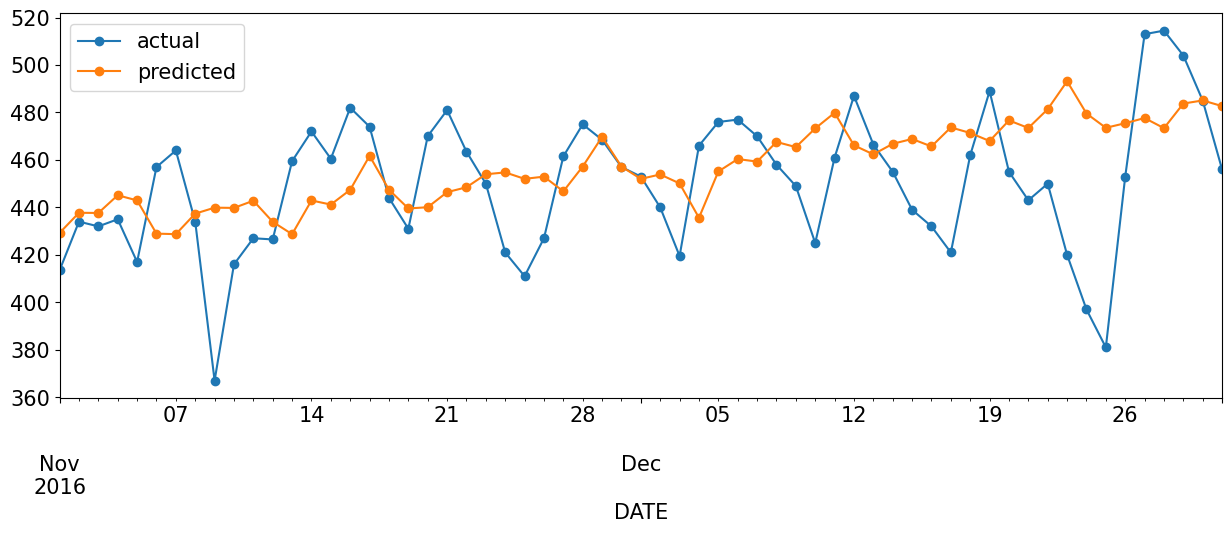

In [74]:
test_data['English'].plot(style='-o', figsize=(15, 5), label='actual')
pred_df['pred'].plot(style='-o', label='predicted')
plt.legend()
plt.show()

In [76]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape 
def performance_metrics(actual, predicted):
  print("MAE :", round(mae(actual, predicted), 3))
  print("RMSE : ", round(mse(actual, predicted), 3))
  print("MAPE : ", round(mape(actual, predicted), 3))

In [77]:
performance_metrics(test_data['English'], pred_df['pred'])

MAE : 24.301
RMSE :  963.79
MAPE :  0.056


In [78]:
def plot_train_test_pred(train,test,pred_df):
    fig,ax = plt.subplots(figsize=(12,7))
    kws = dict(marker='o')
    
    ax.plot(train,label='Train')
    ax.plot(test,label='Test')
    ax.plot(pred_df,label='Prediction',ls='-',linewidth=3)

    ax.fill_between(x=pred_df.index)
    ax.set_title('Model Validation', fontsize=22)
    return fig,ax

TypeError: ignored

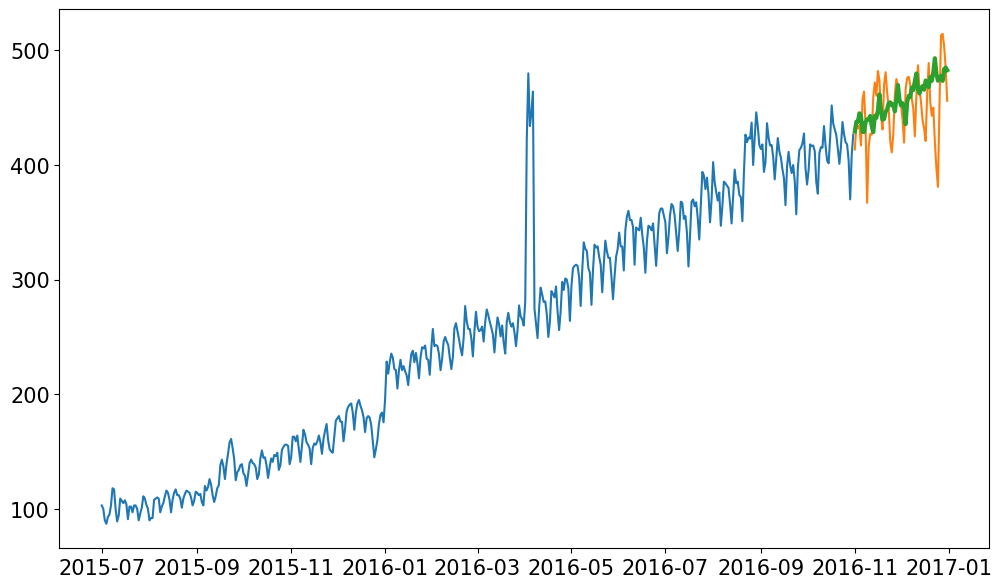

In [79]:
plot_train_test_pred(train_data['English'],test_data['English'],pred_df['pred'])

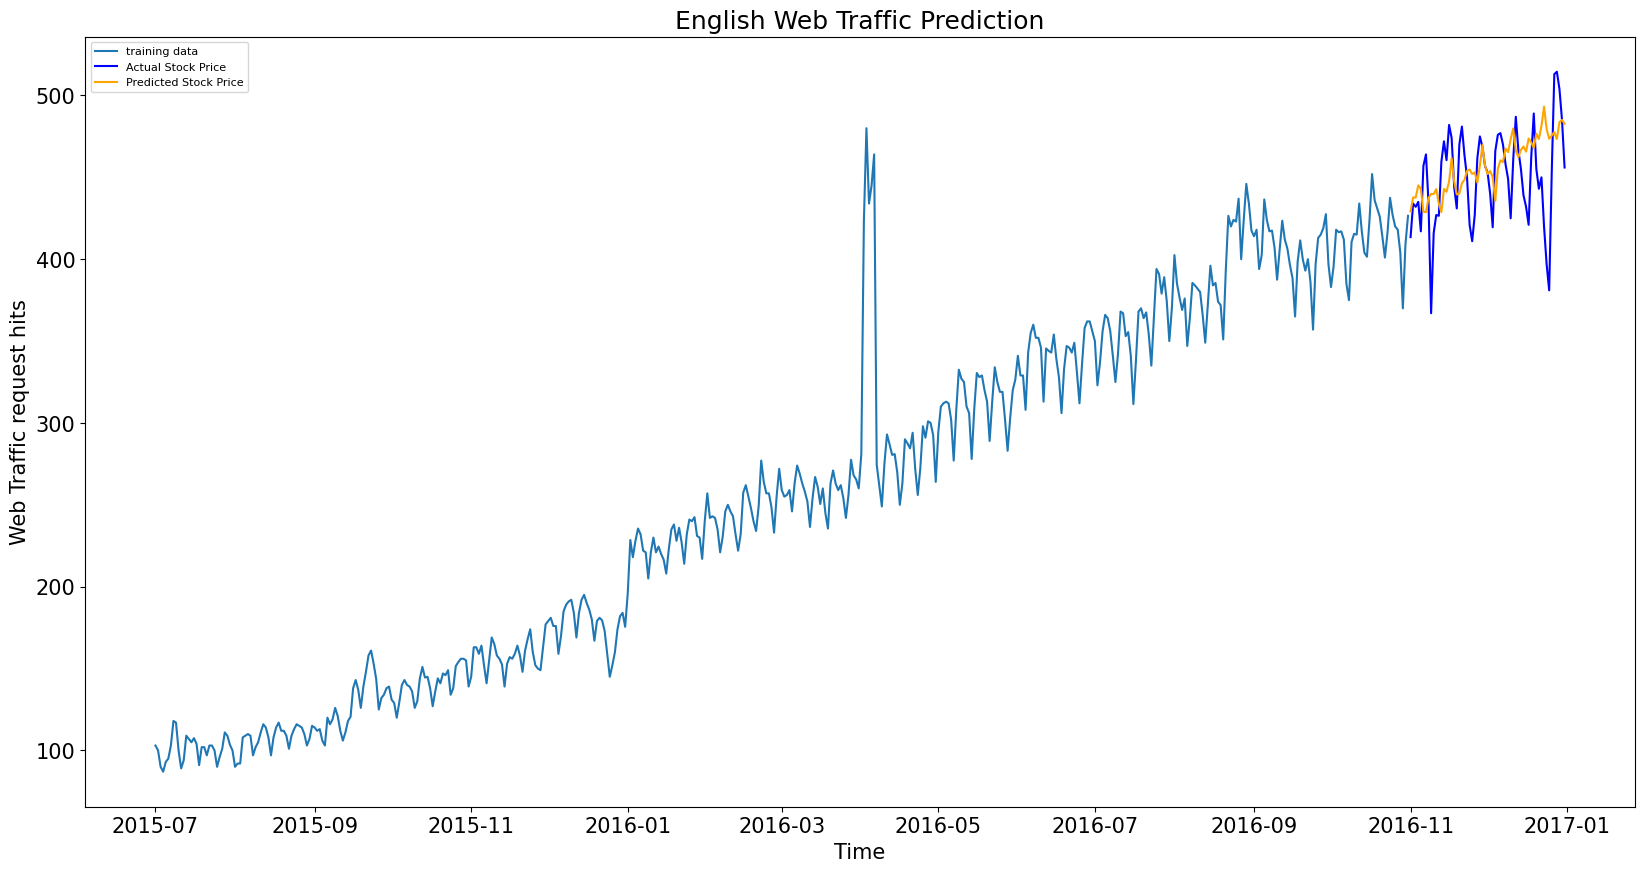

In [82]:
# Forecast
plt.rcParams['figure.figsize'] = (20, 10)
fc = model.forecast(len(test_data), alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
#lower_series = pd.Series(conf[:, 0], index=test_data.index)
#upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
#plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data['English'], label='training data')
plt.plot(test_data['English'], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
 #                color='k', alpha=.10)
plt.title('English Web Traffic Prediction')
plt.xlabel('Time')
plt.ylabel('Web Traffic request hits')
plt.legend(loc='upper left', fontsize=8)
plt.show()

##Use exogenous variable to train SARIMAX model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=2.26 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4490.226, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4343.630, Time=1.49 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.70 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4489.861, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4252.309, Time=1.79 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.25 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.94 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4250.312, Time=1.27 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4349.688, Time=0.51 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=5.35 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.80 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4252.306, Time=1.01 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=9.94 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=4252.309, T

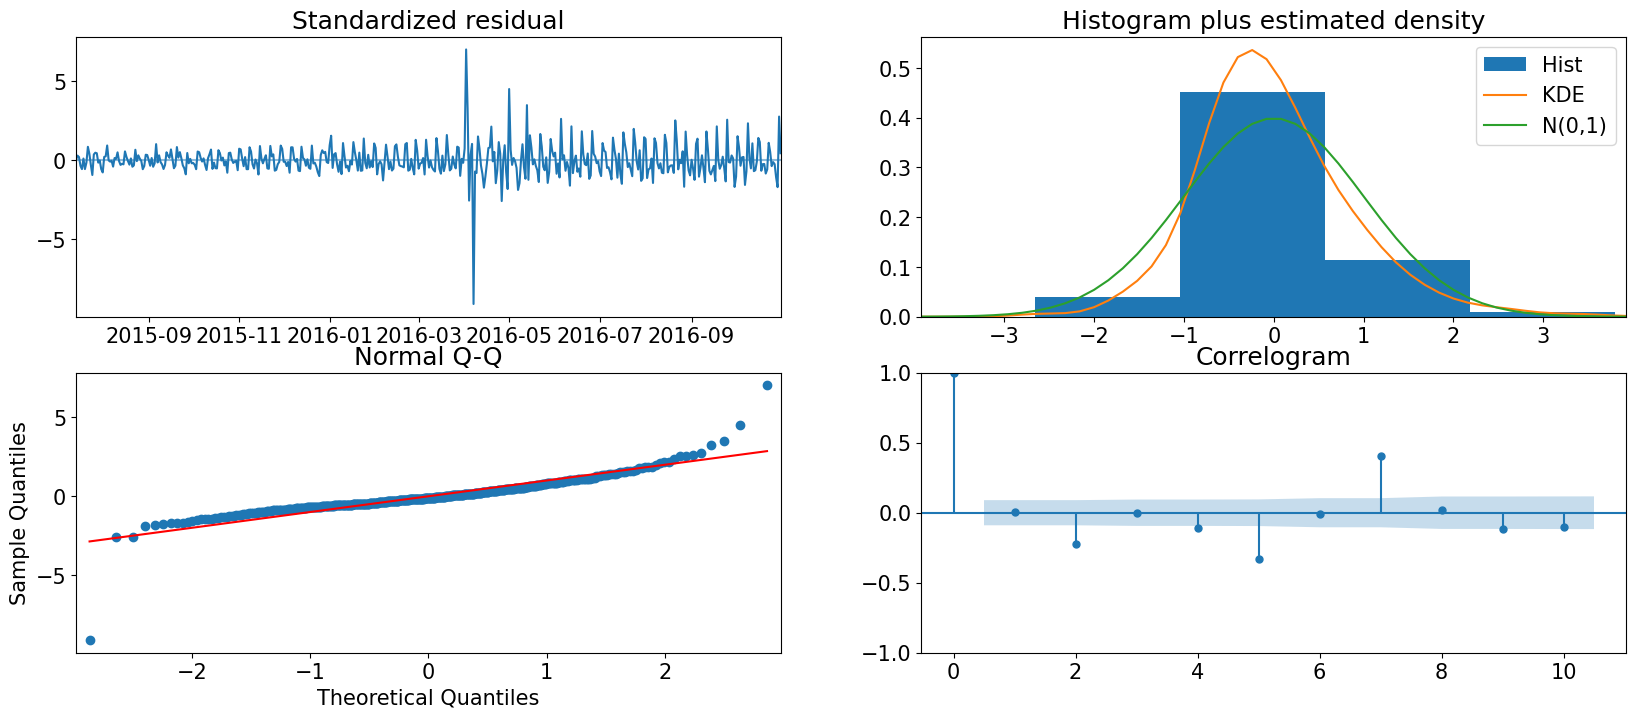

In [84]:

model_autoARIMA = auto_arima(train_data['English'],exogenous=train_data['exog'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=8, 
                      max_q=9, # maximum p and q
                      m=12,
                      start_P=0, seasonal=True,
                      d=1, 
                      D=1,             # frequency of series
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(20,8))
plt.show()

In [85]:
model = SARIMAX(train_data['English'], exog=train_data['exog'], order=(9, 1, 5), seasonal_order=(2, 1, 3, 14))
model = model.fit(disp=False)

exog_forecast = test_data[['exog']]
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1], exog=exog_forecast).rename('Predictions')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


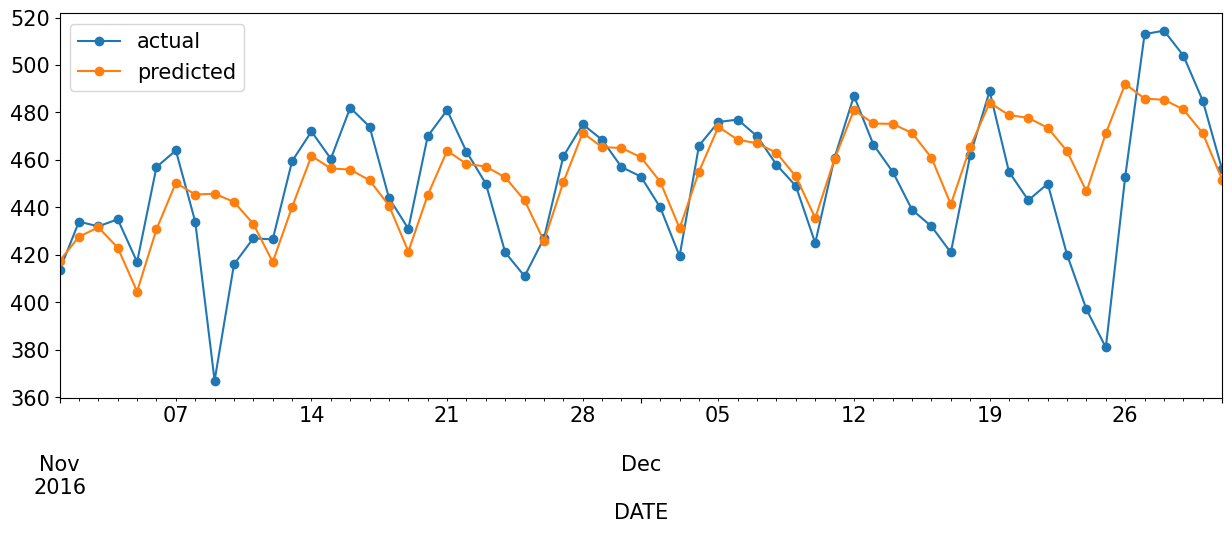

In [86]:
test_data['English'].plot(style='-o', figsize=(15, 5), label='actual')
predictions.plot(style='-o', label='predicted')
plt.legend()
plt.show()

In [87]:
performance_metrics(test_data['English'],predictions)

MAE : 17.197
RMSE :  583.715
MAPE :  0.04


In [88]:
model.get_forecast(steps=61, exog=exog_forecast).conf_int(0.05).values[:5]

array([[393.11943127, 441.77058781],
       [394.7096183 , 460.62685864],
       [394.46858579, 468.70872282],
       [381.18213551, 464.89125474],
       [359.52206252, 449.58891601]])

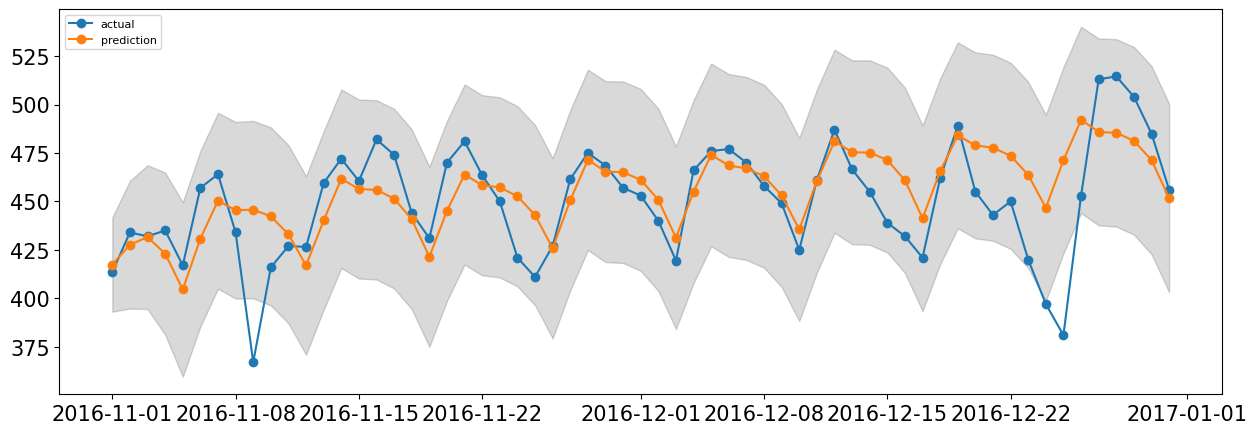

In [89]:
test_data[['lower', 'upper']] = model.get_forecast(steps=61, exog=exog_forecast).conf_int(0.1).values

plt.figure(figsize=(15, 5))
plt.plot(test_data['English'], '-o', label='actual')
plt.plot(predictions, '-o', label='prediction')
plt.fill_between(test_data.index, test_data['lower'], test_data['upper'], color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)
plt.show()

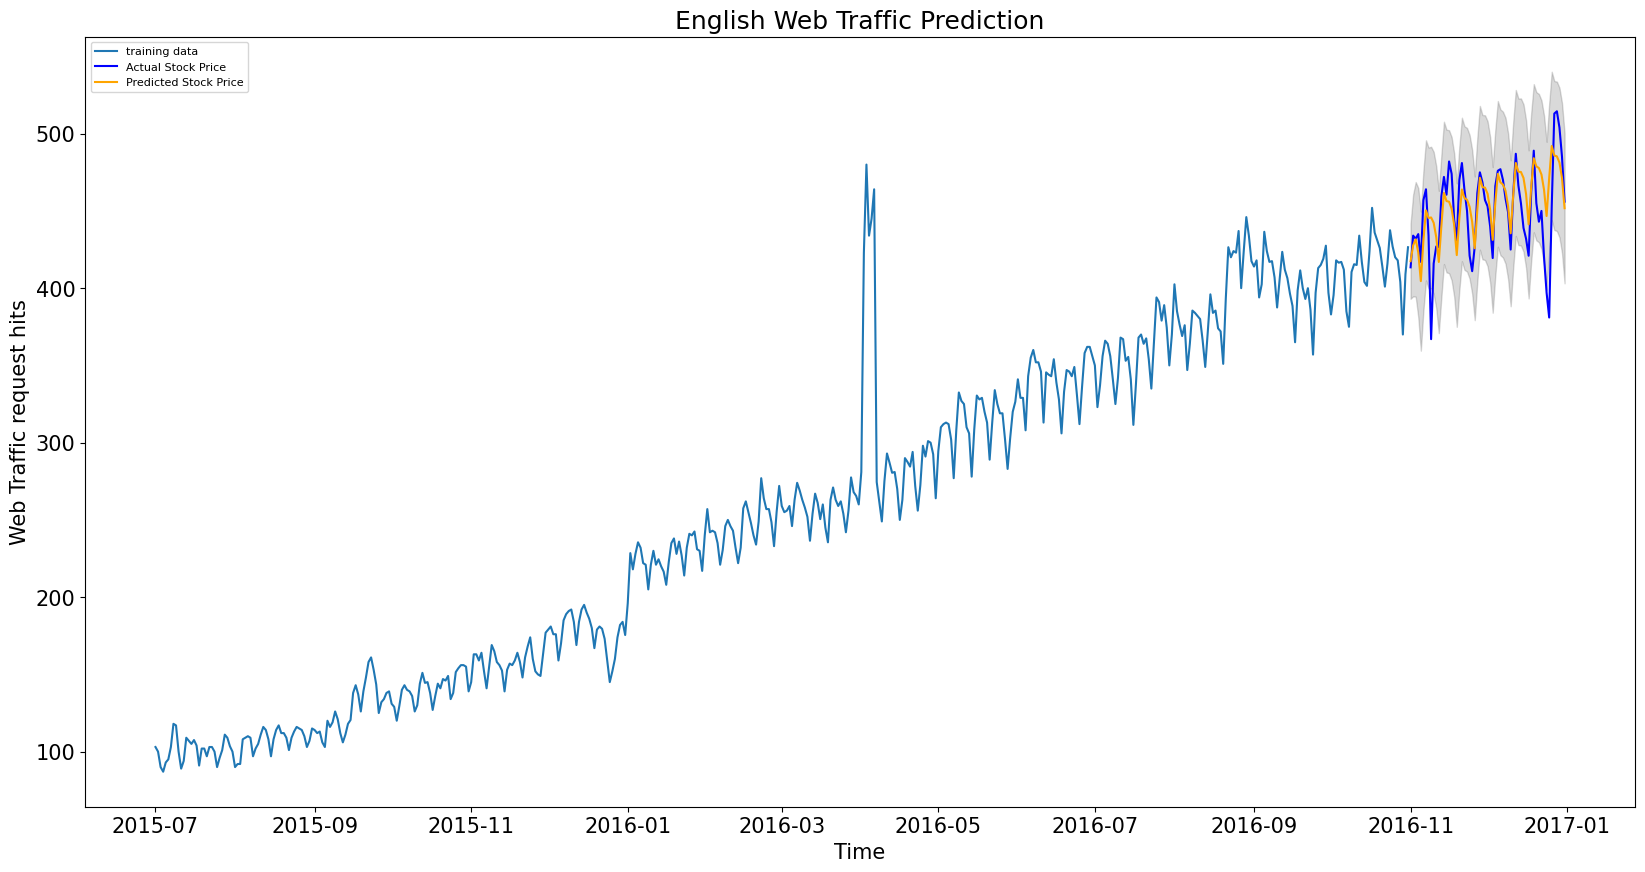

In [90]:
# Forecast
plt.rcParams['figure.figsize'] = (20, 10)

plt.plot(train_data['English'], label='training data')
plt.plot(test_data['English'], color = 'blue', label='Actual Stock Price')
plt.plot(predictions, color = 'orange',label='Predicted Stock Price')

plt.fill_between(test_data.index, test_data['lower'], test_data['upper'], color='k', alpha=.15)
plt.title('English Web Traffic Prediction')
plt.xlabel('Time')
plt.ylabel('Web Traffic request hits')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Prophet

In [91]:
from prophet import Prophet

In [98]:
df_Eng = df.reset_index().loc[:, ['DATE', 'English', 'exog']].rename(columns={'DATE':'ds', 'English':'y', 'exog':'holiday'})
df_Eng.head()

Language         ds      y  holiday
0        2015-07-01  103.0        0
1        2015-07-02  100.0        0
2        2015-07-03   90.0        0
3        2015-07-04   87.0        0
4        2015-07-05   93.0        0

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjlnoq7xj/d9h0936n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjlnoq7xj/vuqmp2ey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37721', 'data', 'file=/tmp/tmpjlnoq7xj/d9h0936n.json', 'init=/tmp/tmpjlnoq7xj/vuqmp2ey.json', 'output', 'file=/tmp/tmpjlnoq7xj/prophet_modelduyrmze2/prophet_model-20230421131541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:15:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:15:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


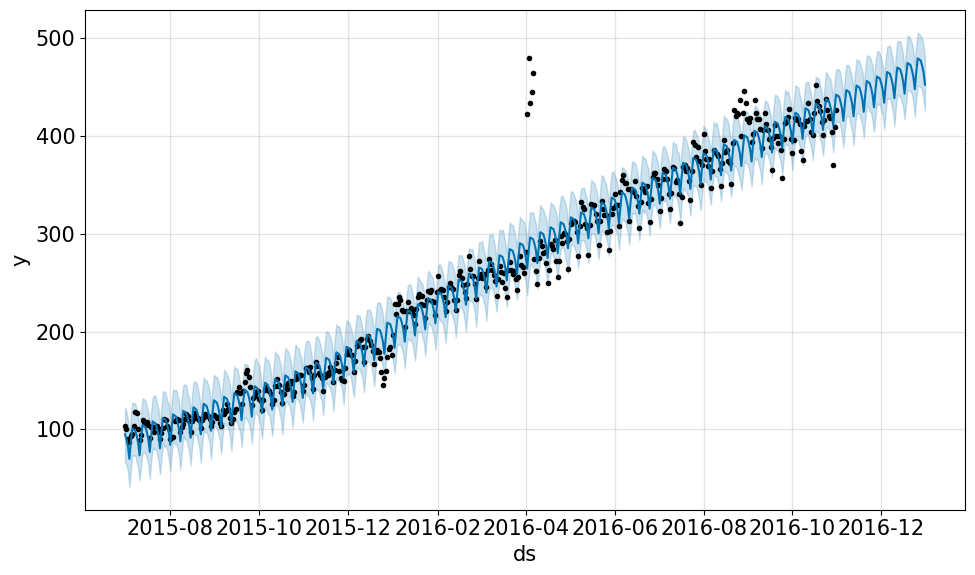

In [105]:
m = Prophet()
m.fit(df_Eng.loc[:, ['ds', 'y']][:-61])
future = m.make_future_dataframe(periods=61, freq='D')
fore_non_Exo = m.predict(future)
m.plot(fore_non_Exo)
plt.show()

In [106]:
fore_non_Exo['yhat'].head()

0    94.958967
1    89.695652
2    82.548353
3    69.678506
4    87.094334
Name: yhat, dtype: float64

In [107]:
pd.concat([df_Eng, fore_non_Exo[['yhat']]],axis=1)

ds      y  holiday        yhat
0   2015-07-01  103.0        0   94.958967
1   2015-07-02  100.0        0   89.695652
2   2015-07-03   90.0        0   82.548353
3   2015-07-04   87.0        0   69.678506
4   2015-07-05   93.0        0   87.094334
..         ...    ...      ...         ...
545 2016-12-27  513.0        1  478.354097
546 2016-12-28  514.5        1  477.375155
547 2016-12-29  504.0        1  472.259614
548 2016-12-30  485.0        0  465.260089
549 2016-12-31  456.0        0  452.538016

[550 rows x 4 columns]

In [108]:
df_Eng['y'][-61:].plot(style='-o', figsize=(15, 5), label='actual')
fore_non_Exo['yhat'][-61:].plot(style='-o', label='predicted')
plt.legend()
plt.show()

In [111]:
performance_metrics(df_Eng['y'][-61:], fore_non_Exo['yhat'][-61:])

MAE : 18.124
RMSE :  593.773
MAPE :  0.041


In [113]:
model2 = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model2.add_regressor('holiday')
model2.fit(df_Eng[:-61])
forecast_with_Exo = model2.predict(df_Eng)
fig = model2.plot(forecast_with_Exo)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjlnoq7xj/kkqjf0w5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjlnoq7xj/78bfhzli.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99090', 'data', 'file=/tmp/tmpjlnoq7xj/kkqjf0w5.json', 'init=/tmp/tmpjlnoq7xj/78bfhzli.json', 'output', 'file=/tmp/tmpjlnoq7xj/prophet_modelvemrlmvd/prophet_model-20230421132152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:21:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:21:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [115]:
pd.concat([df_Eng, forecast_with_Exo[['yhat']]], axis=1).tail()

ds      y  holiday        yhat
545 2016-12-27  513.0        1  481.513085
546 2016-12-28  514.5        1  481.543716
547 2016-12-29  504.0        1  477.999872
548 2016-12-30  485.0        0  458.824750
549 2016-12-31  456.0        0  448.057186

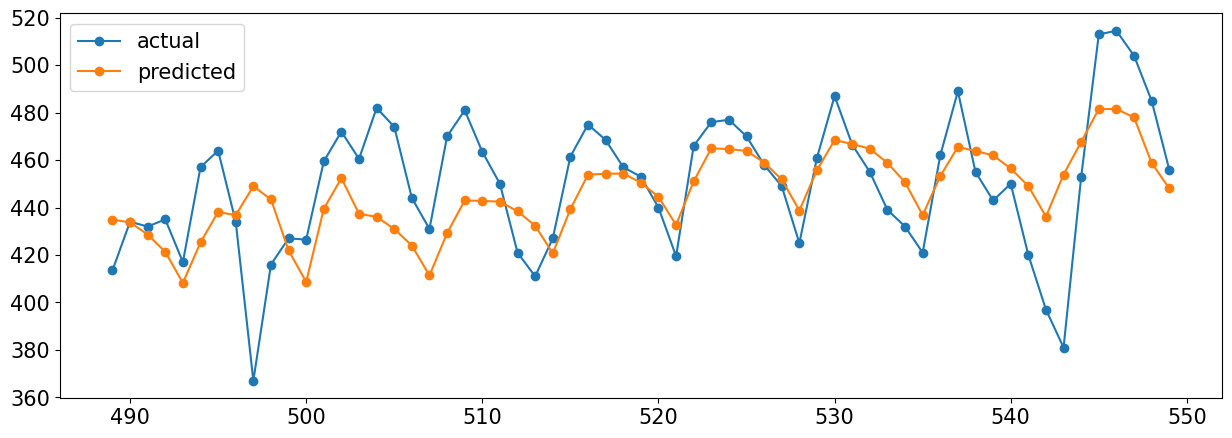

In [116]:
df_Eng['y'][-61:].plot(style='-o', figsize=(15, 5), label='actual')
forecast_with_Exo['yhat'][-61:].plot(style='-o', label='predicted')
plt.legend()
plt.show()

In [119]:
performance_metrics(df_Eng['y'][-61:], forecast_with_Exo['yhat'][-61:])

MAE : 19.035
RMSE :  602.556
MAPE :  0.043


In [ ]:
model = SARIMAX(train_data['English'], exog=train_data['exog'], order=(9, 1, 5), seasonal_order=(2, 1, 3, 14))
model = model.fit(disp=False)

exog_forecast = test_data[['exog']]
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1], exog=exog_forecast).rename('Predictions')

In [126]:
def performance_of_all(lang, train_data, test_data):
  model_new = SARIMAX(train_data[lang], order=(9, 1, 5), seasonal_order=[2, 1, 3, 14])
  model_new = model_new.fit(disp=False)

  predictions_new = model_new.predict(start=test_data.index[0], end=test_data.index[-1],).rename('Predictions')
  print('--'*50)
  print('Metrics for {}'.format(lang))

  test_data[lang][-61:].plot(style='-o', figsize=(15, 5), label='actual')
  predictions_new[-61:].plot(style='-o', label='predicted')
  plt.legend()
  plt.show()
  performance_metrics(test_data[lang], predictions_new)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for Chinese


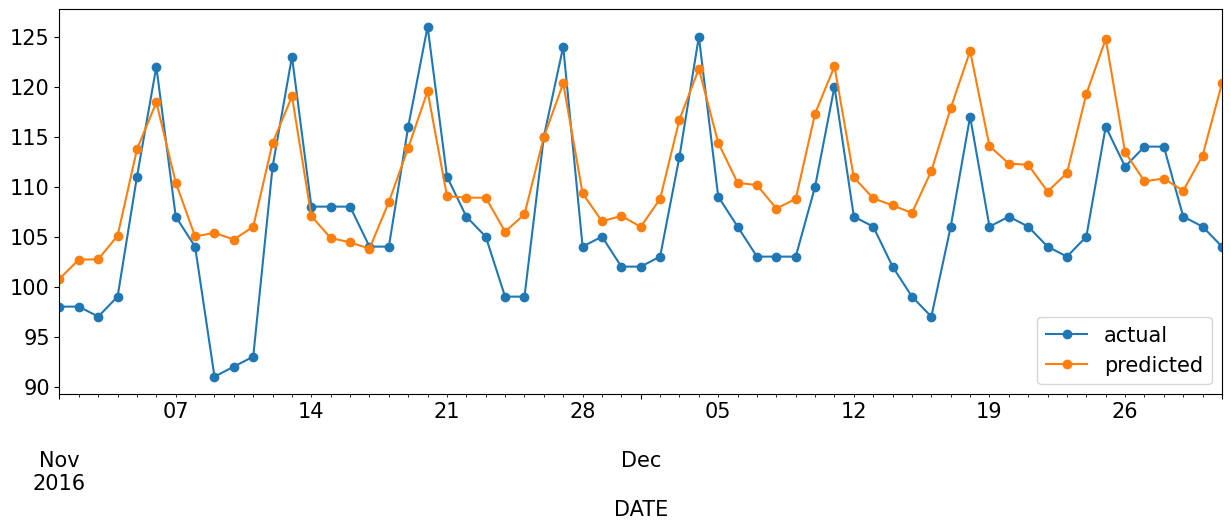

MAE : 5.471
RMSE :  43.548
MAPE :  0.053


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for English


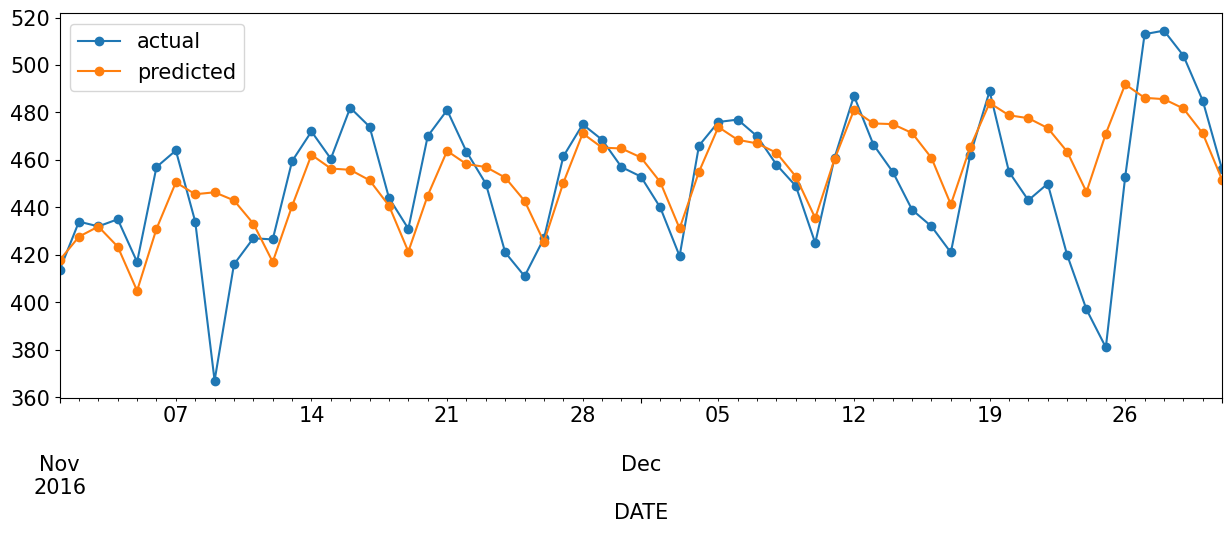

MAE : 17.168
RMSE :  582.56
MAPE :  0.04


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for French


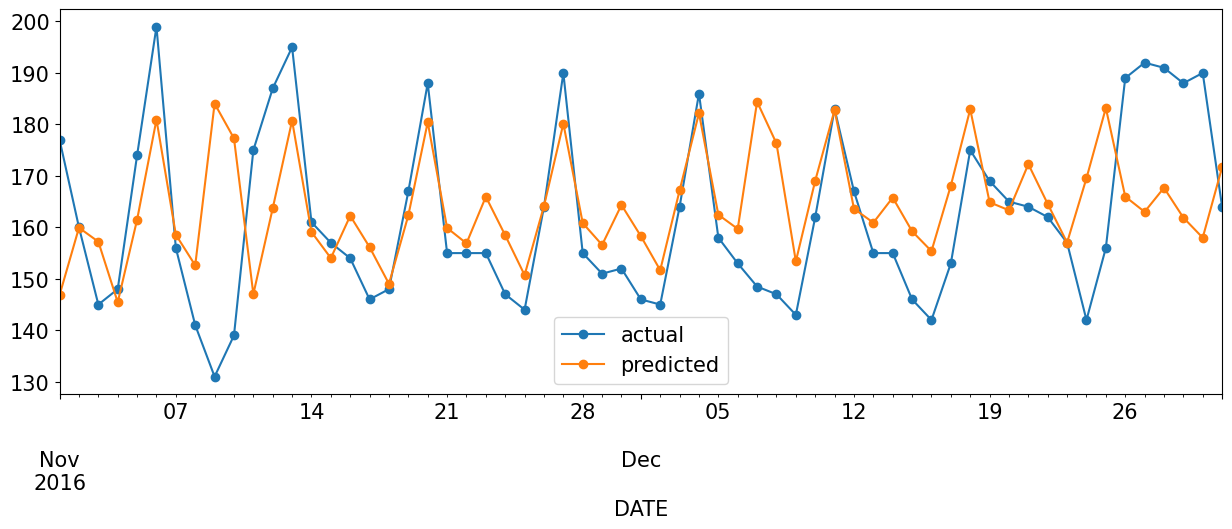

MAE : 12.378
RMSE :  279.855
MAPE :  0.077


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for German


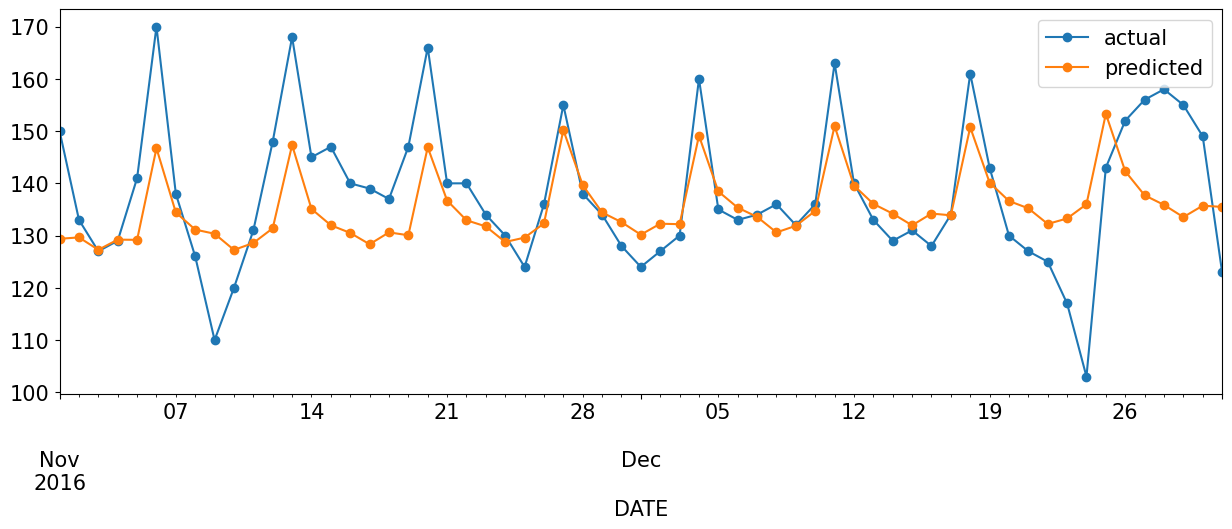

MAE : 8.446
RMSE :  124.854
MAPE :  0.061


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for Spanish


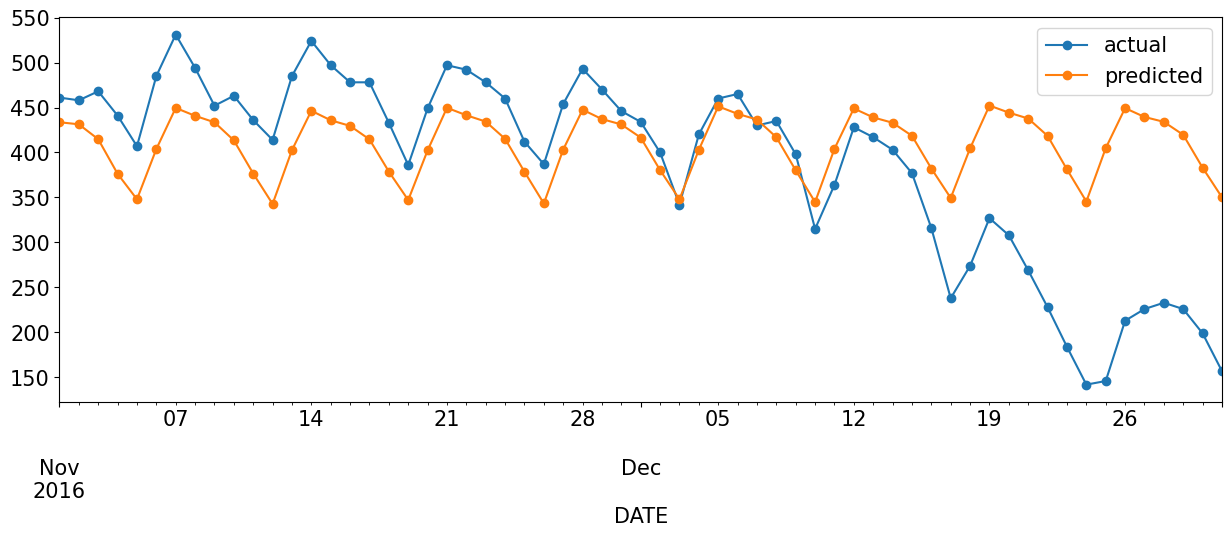

MAE : 76.296
RMSE :  10256.959
MAPE :  0.291


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for commons


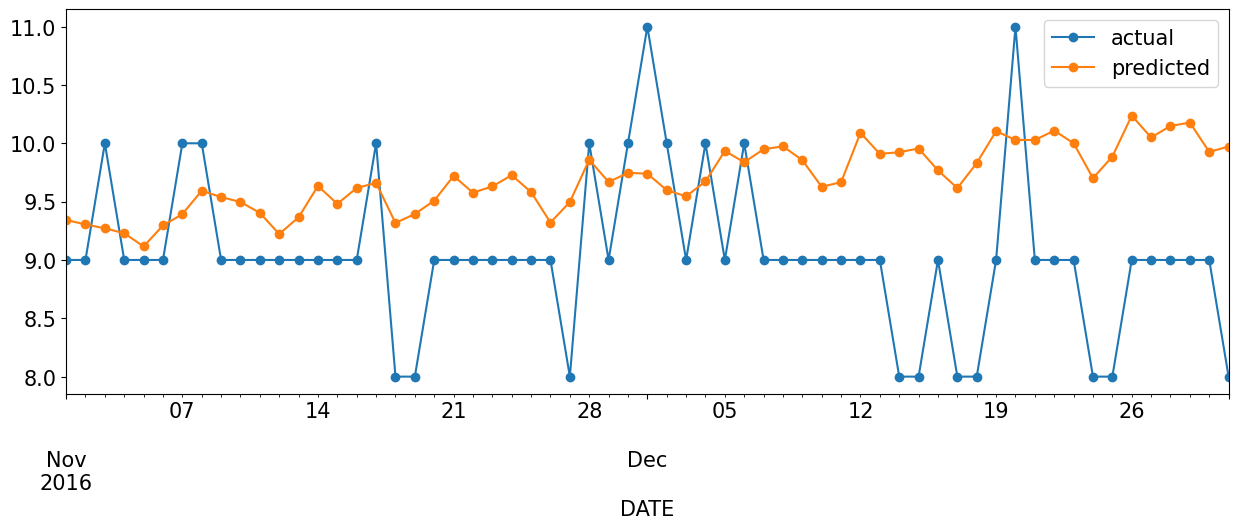

MAE : 0.829
RMSE :  0.933
MAPE :  0.095


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for japanese


MAE : 7.195
RMSE :  89.208
MAPE :  0.032


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for other


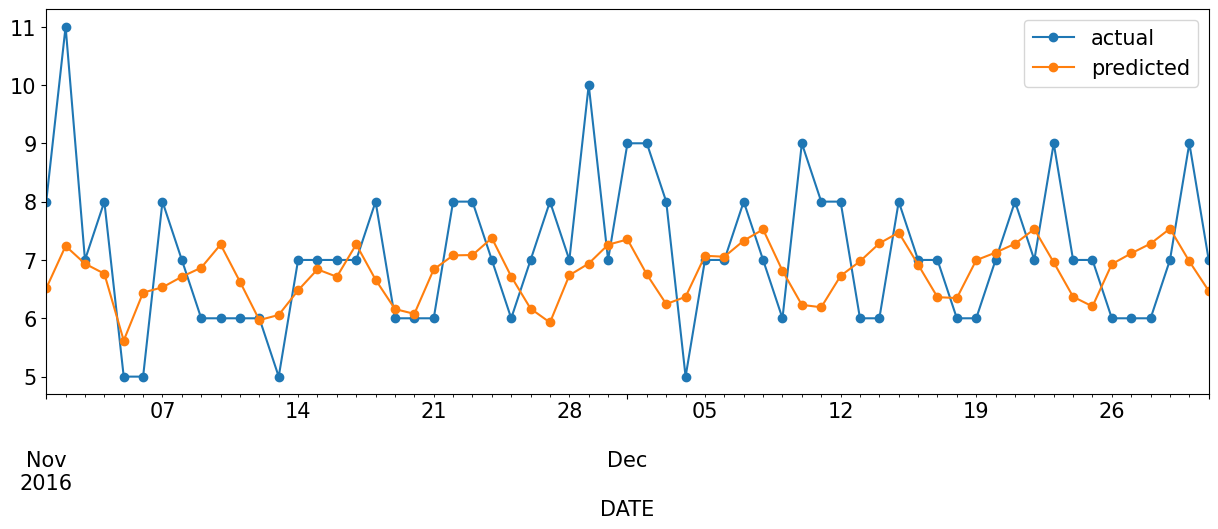

MAE : 0.957
RMSE :  1.505
MAPE :  0.13


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for russian


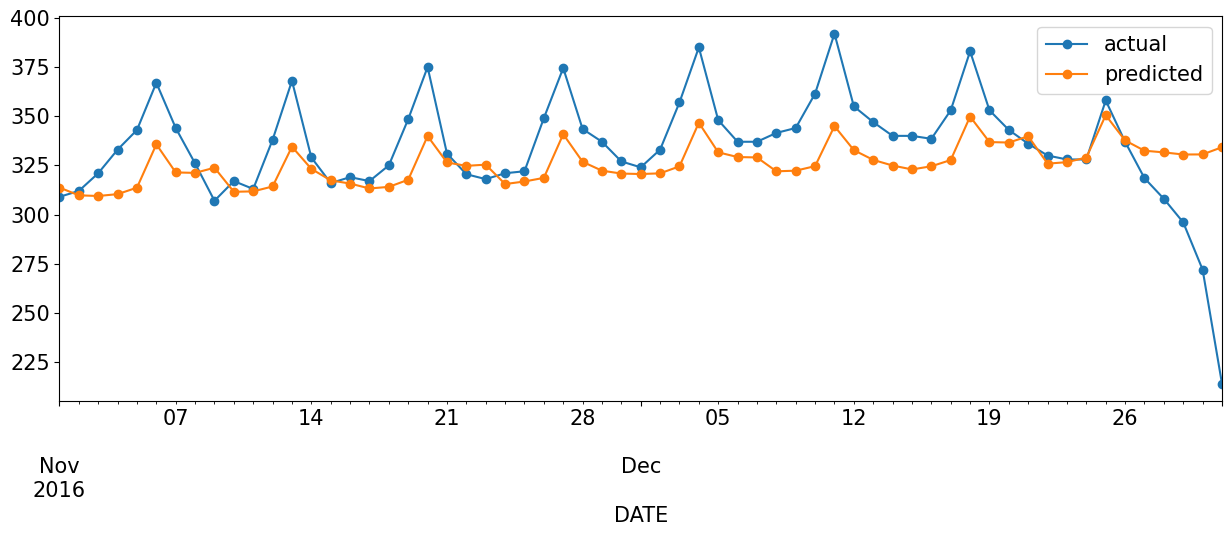

MAE : 18.21
RMSE :  675.205
MAPE :  0.057


In [127]:
for lan in train_data.columns[:-1]:
  performance_of_all(lan, train_data, test_data)

# Observations & Insights
*   1st and 2nd quarter are where the Page Hits are higher compared
*  There is a parttern in Monthly hits From Jan to jun Web traffic hits are higher and Again on th july it decreases and rises slowly.
*   Viewers on page is very low during Thursday, Friday, Saturday
*   Maximum numbers of web Hits starts of the week - Sunday, Monday, Tuesday
*   Web Traffic is average medium on Wednesday
*   Most viewed page by languges are,  
    *   english(33%)
    *   spanish(21%) 
    *   russian(15%) 
    *   japanese(10%) 
    *   french(7%)
    *   german(7%) 
    *   chinese(5%)

# Recommendations

Based on the above observations and insights, some of the recommendations to consider are: 
* Since Our Webpages are for Research purpose there is more hits on the start of the Weekday that is Monday.We have to make sure to provide more reliable for the customer.
* Customized Ads may be displayed on high viewership days such as Sunday, Monday, and Tuesday at the beginning of the week.
* On other days of the week, Promotional Ads can be aired to generate more viewership and page hits.
* Additionally, Language and regional-specific Ads can attract more viewership for less commonly spoken languages such as Chinese, German, French, and Japanese.
* To target specific communities, Language-specific Ads can be published based on their respective settlement areas.